# Atividade Computacional #2 
---
**Disciplina:** PMT07 – Transferência de Calor e Mecânica dos Fluidos Computacional 

**Alunos:** Abner Vieira Pereira e João Gabriel Clarindo

In [1]:
import numpy as np
import sympy as sy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.display import Math, Image

## Enunciado

Obtenha a distribuição de temperaturas em uma placa bidimensional (2D) com espessura de 1cm e 
condutividade térmica k = 1kW/(m.K), cujas demais dimensões e condições de contorno são dadas na 
Figura 1. Para solução, utilize uma grade computacional uniforme de no mínimo 10 x 5 volumes de 
controle.

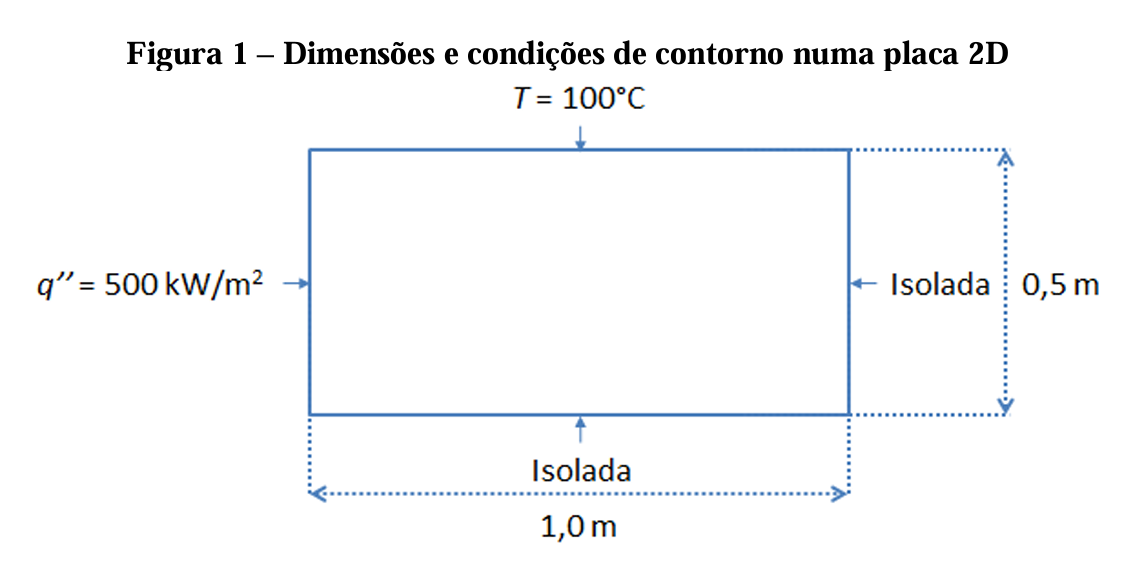

In [2]:
Image("fig_1.png", width=500)

## Modelagem física do problema

A discretização será feita a partir da equação da condução de calor levando em consideração as seguintes hipóteses:

- Condução bidimensional;

- Malha uniforme;

- Material isotrópico, isto é, propriedades constante;

- Regime permanente;

- Sem geração de calor.


Assim, podem-se escrever a seguinte equação:

In [3]:
x, y, k = sy.symbols('x y k')
T = sy.Function('T')(x, y)

eq_cond_2d = sy.Eq(k * sy.diff(T, x, 2) + k * sy.diff(T, y, 2), 0)
eq_cond_2d

Eq(k*Derivative(T(x, y), (x, 2)) + k*Derivative(T(x, y), (y, 2)), 0)

### Discretização dos nós centrais

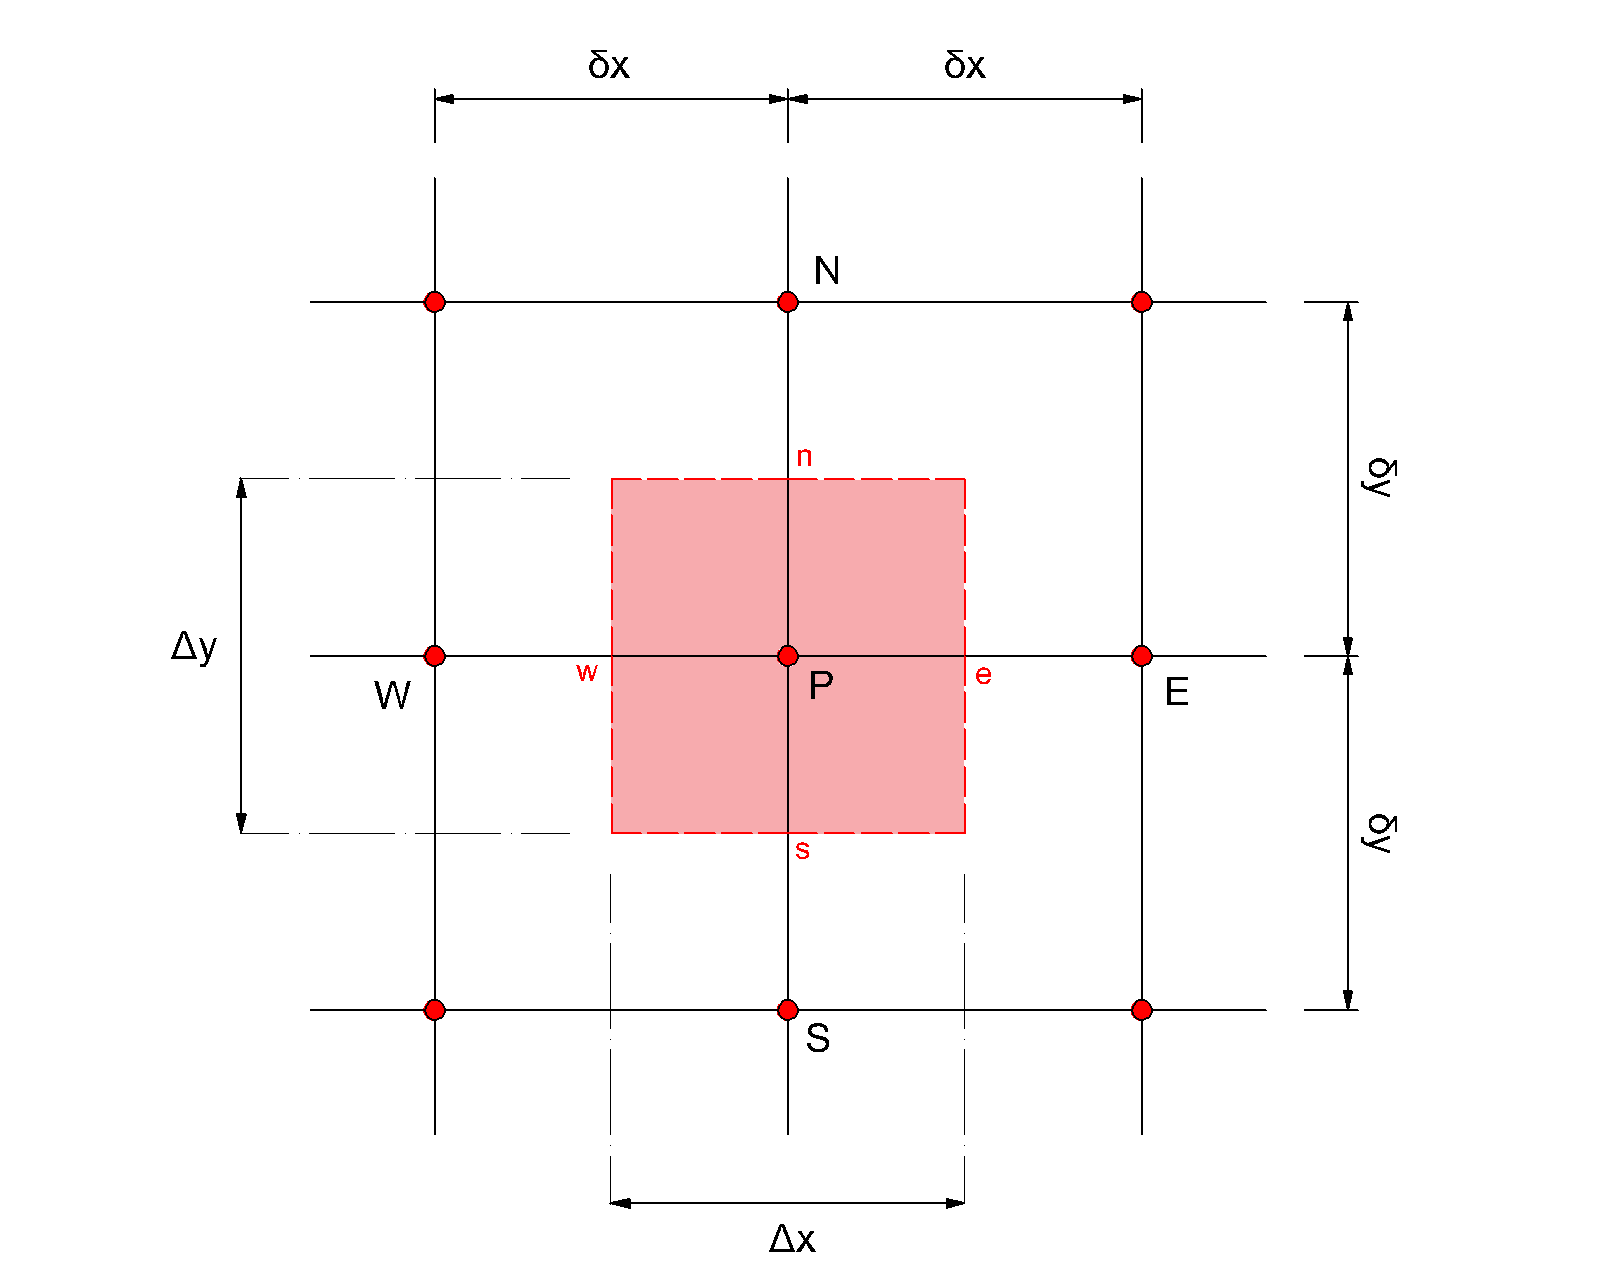

In [4]:
Image("discretização_2d.png", width=500)

Levando em consideração o volume de controle acima, pode-se aplicar uma integral nas direções x, y e z, assim:

$$\int_{V} \frac{\partial}{\partial x} \left( k \, \frac{\partial T}{\partial x}\right) \, dV + \int_{V} \frac{\partial}{\partial y} \left( k \, \frac{\partial T}{\partial y}\right) \, dV = 0 $$

Pode-se então aplicar uma integração espacial em cada direção, e, sabendo que a espessura ($e$) foi definida, tem-se:

**1. Termo difusivo na direção x:**

$$\int_{n}^{s} \int_{w}^{e} \frac{\partial}{\partial x} \left( k \, \frac{\partial T}{\partial x}\right) \, dx \, dy \, e = \frac{k \, e}{\Delta x} [(T_E - T_P) - (T_P - T_W)] \, \Delta y$$

**2. Termo difusivo na direção y:**

$$\int_{w}^{e} \int_{n}^{s} \frac{\partial}{\partial y} \left( k \, \frac{\partial T}{\partial y}\right) \, dy \, dx \, e= \frac{k \, e}{\Delta y} [(T_N - T_P) - (T_P - T_S)] \, \Delta x$$

Juntando os dois resultados, tem-se:

$$\frac{k \, e}{\Delta x} [(T_E - T_P) - (T_P - T_W)] \, \Delta y + \frac{k \, e}{\Delta y} [(T_N - T_P) - (T_P - T_S)] \, \Delta x = 0$$

$$\frac{k \, e \, \Delta y}{\Delta x}(T_E - 2T_P + T_W) + \frac{k \, e \, \Delta x}{\Delta y} (T_N - 2T_P + T_S) = 0$$

Rearranjando os termos a fim de se obter o formato algébrico característico do CFD:

$$\left[2 \, e \left(\frac{k \, \Delta y}{\Delta x} + \frac{k \, \Delta x}{\Delta y}\right)\right]T_P = \left(\frac{k \, e \, \Delta y}{\Delta x}\right) \, T_E + \left(\frac{k \, e \, \Delta y}{\Delta x}\right) \, T_W + \left(\frac{k \, e \, \Delta x}{\Delta y}\right) \, T_N + \left(\frac{k \, e \, \Delta x}{\Delta y}\right) T_S$$

Portanto, a forma geral da equação de conservação para este caso 2D pode ser expressa como:

$$a_P T_P = a_E T_E + a_W T_W + a_N T_N + a_S T_S$$

| Coeficiente | Expressão |
| --- | --- |
| $a_W$ e $a_E$ | $\frac{k \, e\,  \Delta y}{\Delta x}$|
| $a_N$ e $a_S$ | $\frac{k \, e \, \Delta x}{\Delta y}$|
| $a_P$ | $2 \, e \left(\frac{k \, \Delta y}{\Delta x} + \frac{k \, \Delta x}{\Delta y}\right)$|


### Discretização dos nós de fronteira

**1. Dirichlet na fronteira Norte: T = 100°C**

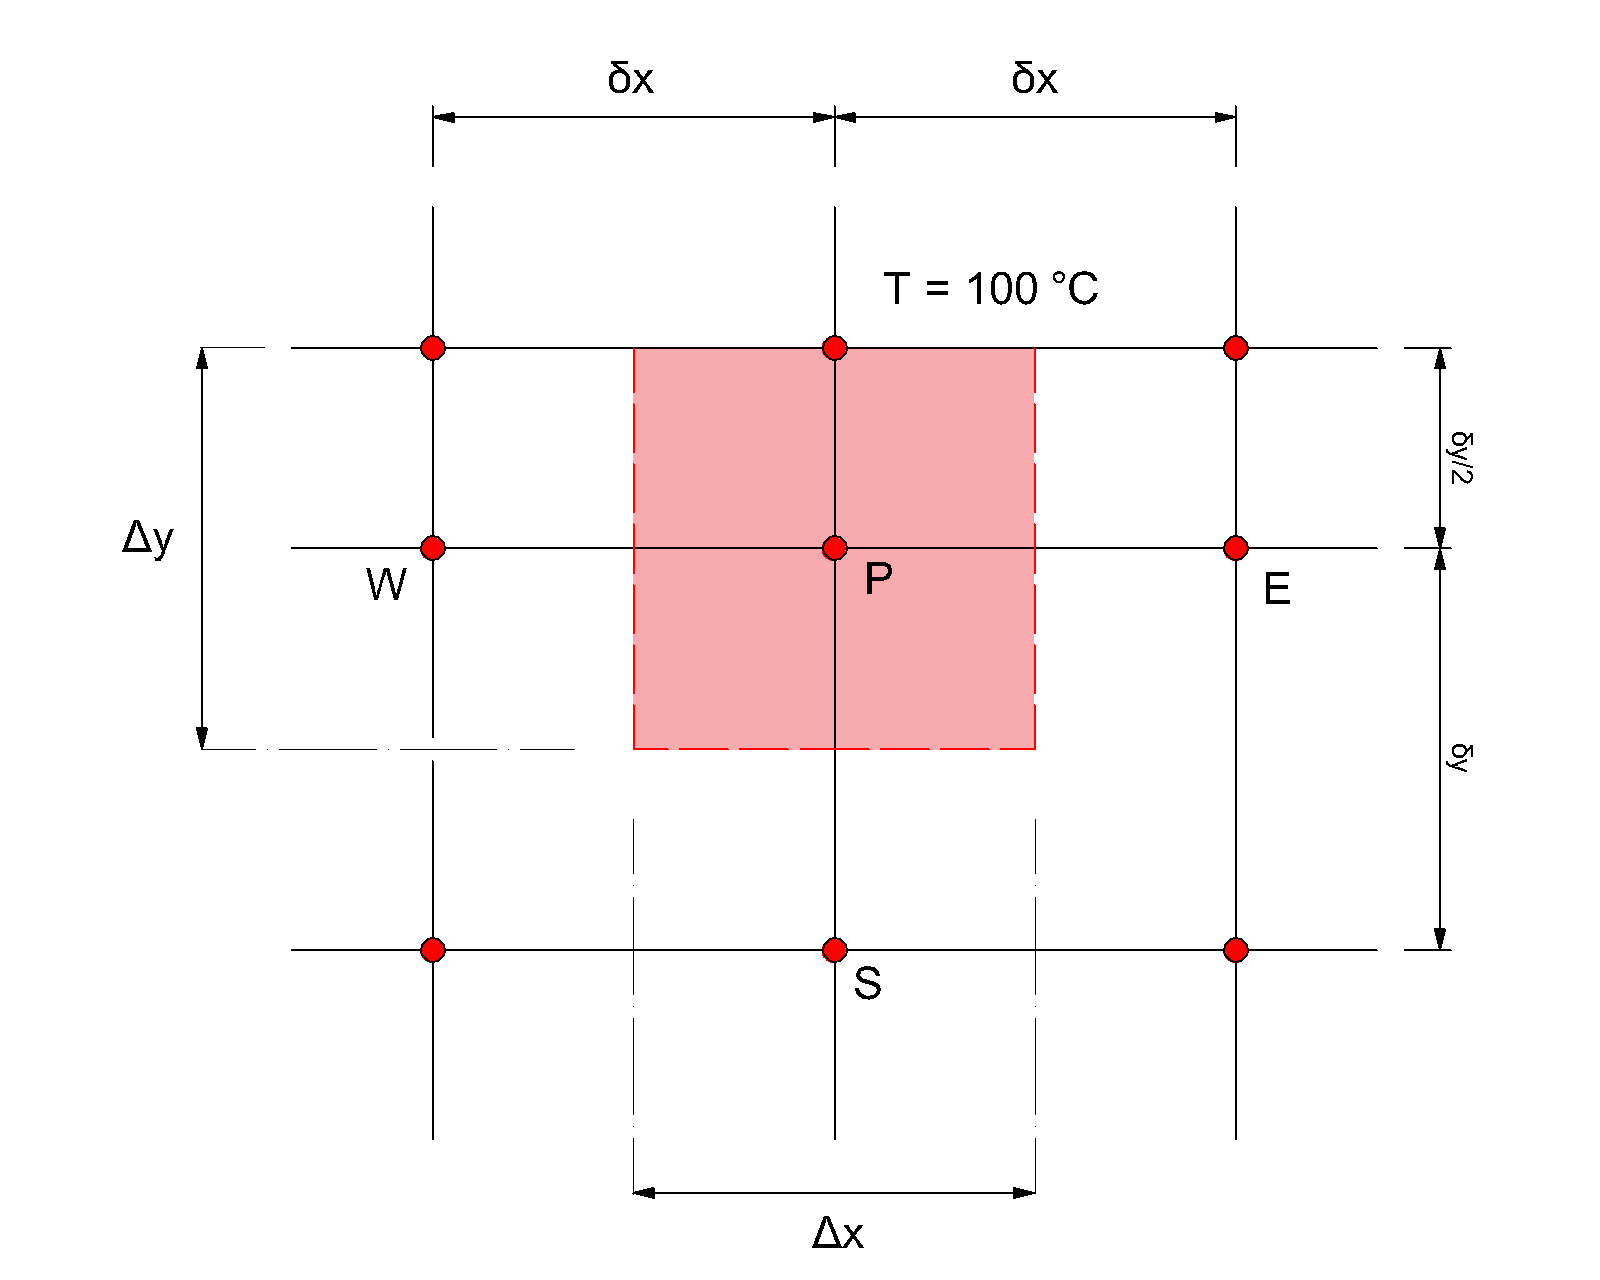

In [5]:
Image("dirichlet_norte.png", width=500)

**1. Termo difusivo na direção x:**

$$\frac{k \,e }{\Delta x} [(T_E - T_P) - (T_P - T_W)] \, \Delta y$$

**2. Termo difusivo na direção y:**

$$\frac{k \, e}{\Delta y/2}(T_{esp} - T_P) - \frac{k \, e}{\Delta y}(T_P - T_S)$$

Juntando os dois resultados acima:


$$\frac{k \,e }{\Delta x} [(T_E - T_P) - (T_P - T_W)] \, \Delta y + \frac{k \, e}{\Delta y/2}(T_{esp} - T_P) - \frac{k \, e}{\Delta y}(T_P - T_S) = 0$$

$$\frac{k \,e }{\Delta x} [(T_E - 2 T_P + T_W)] \, \Delta y + \frac{k \, e}{\Delta y/2}(T_{esp} - T_P) - \frac{k \, e}{\Delta y}(T_P - T_S) = 0$$

Rearranjando os termos, tem-se:

$$\left(\frac{2 \, k \, e \, \Delta y}{\Delta x} + \frac{3 \, k \, e \, \Delta x }{\Delta y}\right) T_P = \left(\frac{k \, e \, \Delta y}{\Delta x}\right)T_E + \left(\frac{k \, e \, \Delta y}{\Delta x}\right)T_W + \left(\frac{k \, e \, \Delta x}{\Delta y}\right)T_S + \left(\frac{2 \, k \, e \, \Delta x}{\Delta y}\right)T_{esp}$$

O formato algébrico padrão utilizado em CFD, pode ser então escrito como:

$$a_P T_P = a_E T_E + a_W T_W + a_S T_S + S_C$$

Onde os coeficientes

| Coeficientes | Expressão |
| --- | --- |
| $a_E$ e $a_W$ | $\frac{k \, e \, \Delta y}{\Delta x}$ |
| $a_P$ | $\frac{2 \, k \, e \, \Delta y}{\Delta x} + \frac{3 \, k \, e \, \Delta x }{\Delta y}$ |
| $a_N$ | $0$   |
| $a_S$ |  $\frac{k \, e \, \Delta x}{\Delta y}$ |
| $S_C$ |  $\left(\frac{2 \, k \, e \, \Delta x}{\Delta y}\right)T_{esp}$ |

**2. Neumann na fronteira Oeste: q" = 500 kW/m²**

Para os volumes de controle adjacentes à fronteira Oeste, utiliza-se um volume de contole de meio passo, isto é ($\Delta x/2$).

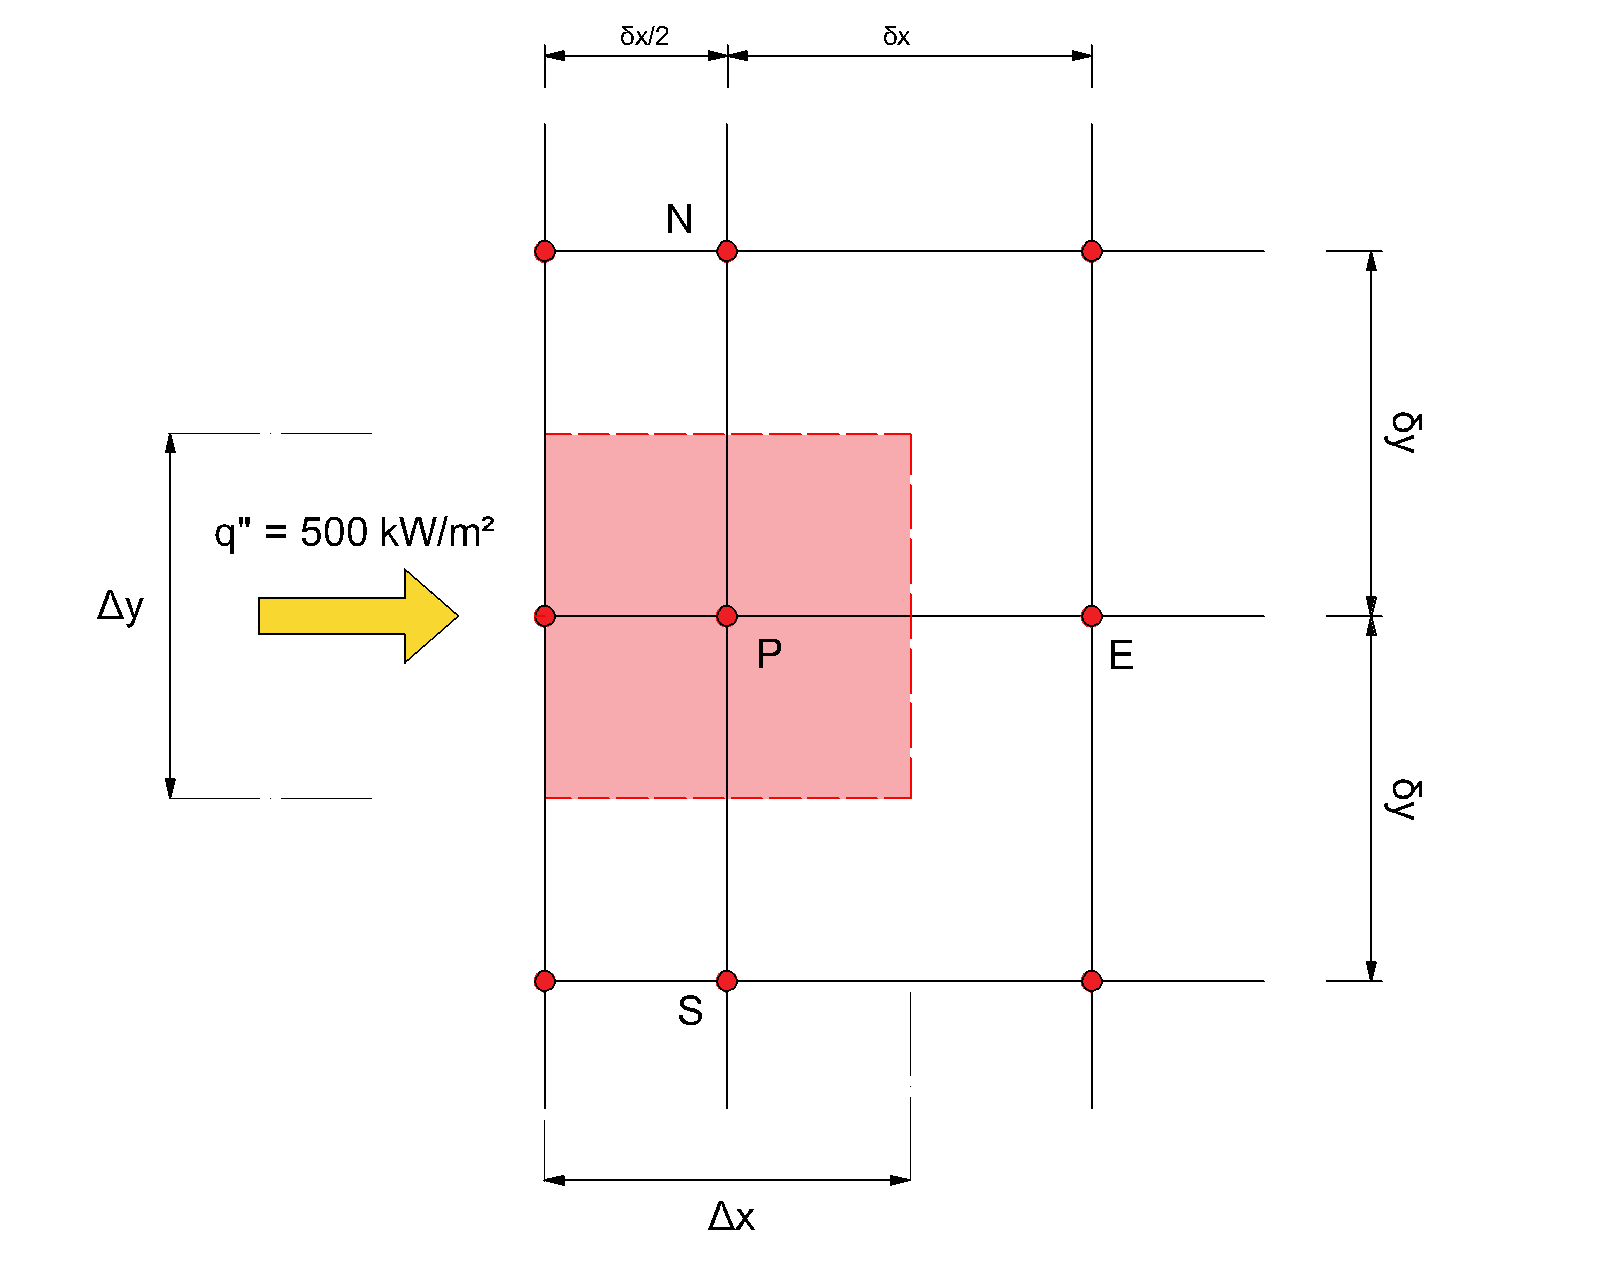

In [6]:
Image("neumann_oeste.png",width=500)

**1. Termo difusivo na direção x:**

$$\frac{k \, e \, \Delta y}{\Delta x}[(T_E - T_P)] + q" \, e \,\Delta y$$


**2. Termo difusivo na direção y:**

$$k \, e \frac{\Delta x}{2} \left(\frac{T_N - T_P}{\Delta y}\right) - k \, e \frac{\Delta x}{2}  \left(\frac{T_P - T_S}{\Delta y}\right)$$


Assim, o balanço de energia nos nós adjacentes à fronteira oeste fica:

$$\frac{k \, e \, \Delta y}{\Delta x}[(T_E - T_P)] + q" \, e \,\Delta y + k \, e \frac{\Delta x}{2} \left(\frac{T_N - T_P}{\Delta y}\right) - k \, e \frac{\Delta x}{2}  \left(\frac{T_P - T_S}{\Delta y}\right) = 0$$

Rearranjando os termos para obter o formato padrão:

$$\left( \frac{k \, e \, \Delta y}{\Delta x} + \frac{k \, e \, \Delta x}{2 \Delta y} + \frac{k \, e \, \Delta x}{2 \Delta y} \right)T_P = \left(\frac{k \, e \, \Delta y}{\Delta x} \right) T_E + \left( \frac{k \, e \, \Delta x}{2 \Delta y}  \right)T_S + \left( \frac{k \, e \, \Delta x}{2 \Delta y}  \right)T_N + q" \, e \, \Delta y $$

A forma algébrica padrão do CFD é:

$$a_P T_P = a_E T_E + a_N T_N + a_S T_S + S_C $$

Onde os coeficientes são:

|Coeficiente| Expressão|
| --- | --- |
|    $a_P$ |   $\frac{k \, e \, \Delta y}{\Delta x} + \frac{k \, e \, \Delta x}{2 \Delta y} + \frac{k \, e \, \Delta x}{2 \Delta y}$  |
| $a_W $| 0 |
| $a_E$ | $\frac{k \, e \, \Delta y}{\Delta x}$|
| $a_N$ e $a_S$| $\frac{k \, e \, \Delta x}{2 \Delta y}$ |
| $S_C$ | $q" \, e \, \Delta y$|

**3. Neumann na fronteira Leste: q" = 0**

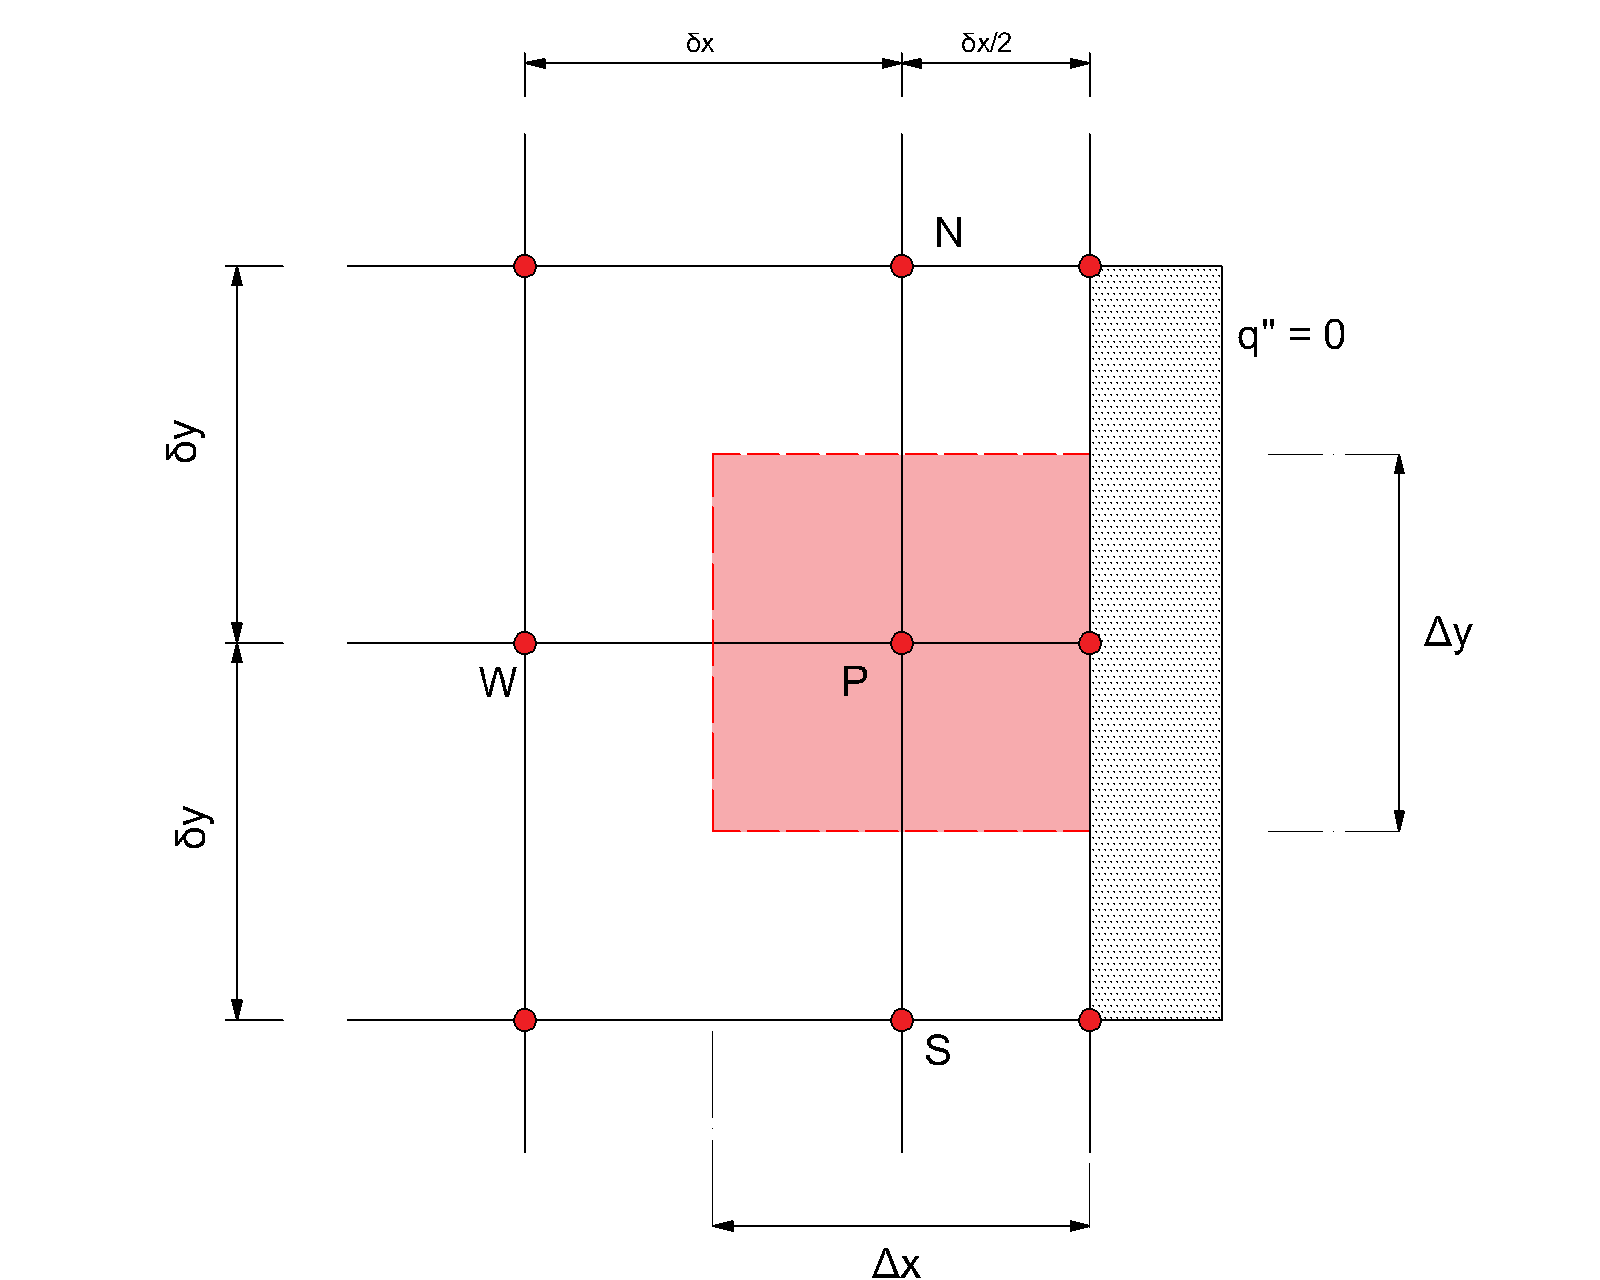

In [7]:
Image("isolado_leste.png", width=500)

**1. Termo difusivo na direção x:**

$$0 - \frac{k \, e \, \Delta y}{\Delta x}[(T_P - T_W)]$$


**2. Termo difusivo na direção y:**

$$k \, e \frac{\Delta x}{2} \left(\frac{T_N - T_P}{\Delta y}\right) - k \, e \frac{\Delta x}{2}  \left(\frac{T_P - T_S}{\Delta y}\right)$$


Assim, o balanço de energia nos nós adjacentes à fronteira leste fica:

$$ \frac{k \, e \, \Delta y}{\Delta x}(T_W - T_P) + k \, e \frac{\Delta x}{2} \left(\frac{T_N - T_P}{\Delta y}\right) - k \, e \frac{\Delta x}{2}  \left(\frac{T_P - T_S}{\Delta y}\right) = 0$$

Rearranjando os termos para obter o formato padrão:

$$\left( \frac{k \, e \, \Delta y}{\Delta x} + \frac{k \, e \, \Delta x}{2 \Delta y} + \frac{k \, e \, \Delta x}{2 \Delta y} \right)T_P = \left(\frac{k \, e \, \Delta y}{\Delta x} \right) T_W + \left( \frac{k \, e \, \Delta x}{2 \Delta y}  \right)T_S + \left( \frac{k \, e \, \Delta x}{2 \Delta y}  \right)T_N $$

A forma algébrica padrão do CFD é:

$$a_P T_P = a_W T_W + a_N T_N + a_S T_S $$

Onde os coeficientes são:

|Coeficiente| Expressão|
| --- | --- |
|    $a_P$ |   $\frac{k \, e \, \Delta y}{\Delta x} + \frac{k \, e \, \Delta x}{2 \Delta y} + \frac{k \, e \, \Delta x}{2 \Delta y}$  |
| $a_W $| $\frac{k \, e \, \Delta y}{\Delta x}$ |
| $a_E$ | 0|
| $a_N$ e $a_S$| $\frac{k \, e \, \Delta x}{2 \Delta y}$ |

**4. Neumann na fronteira Sul**

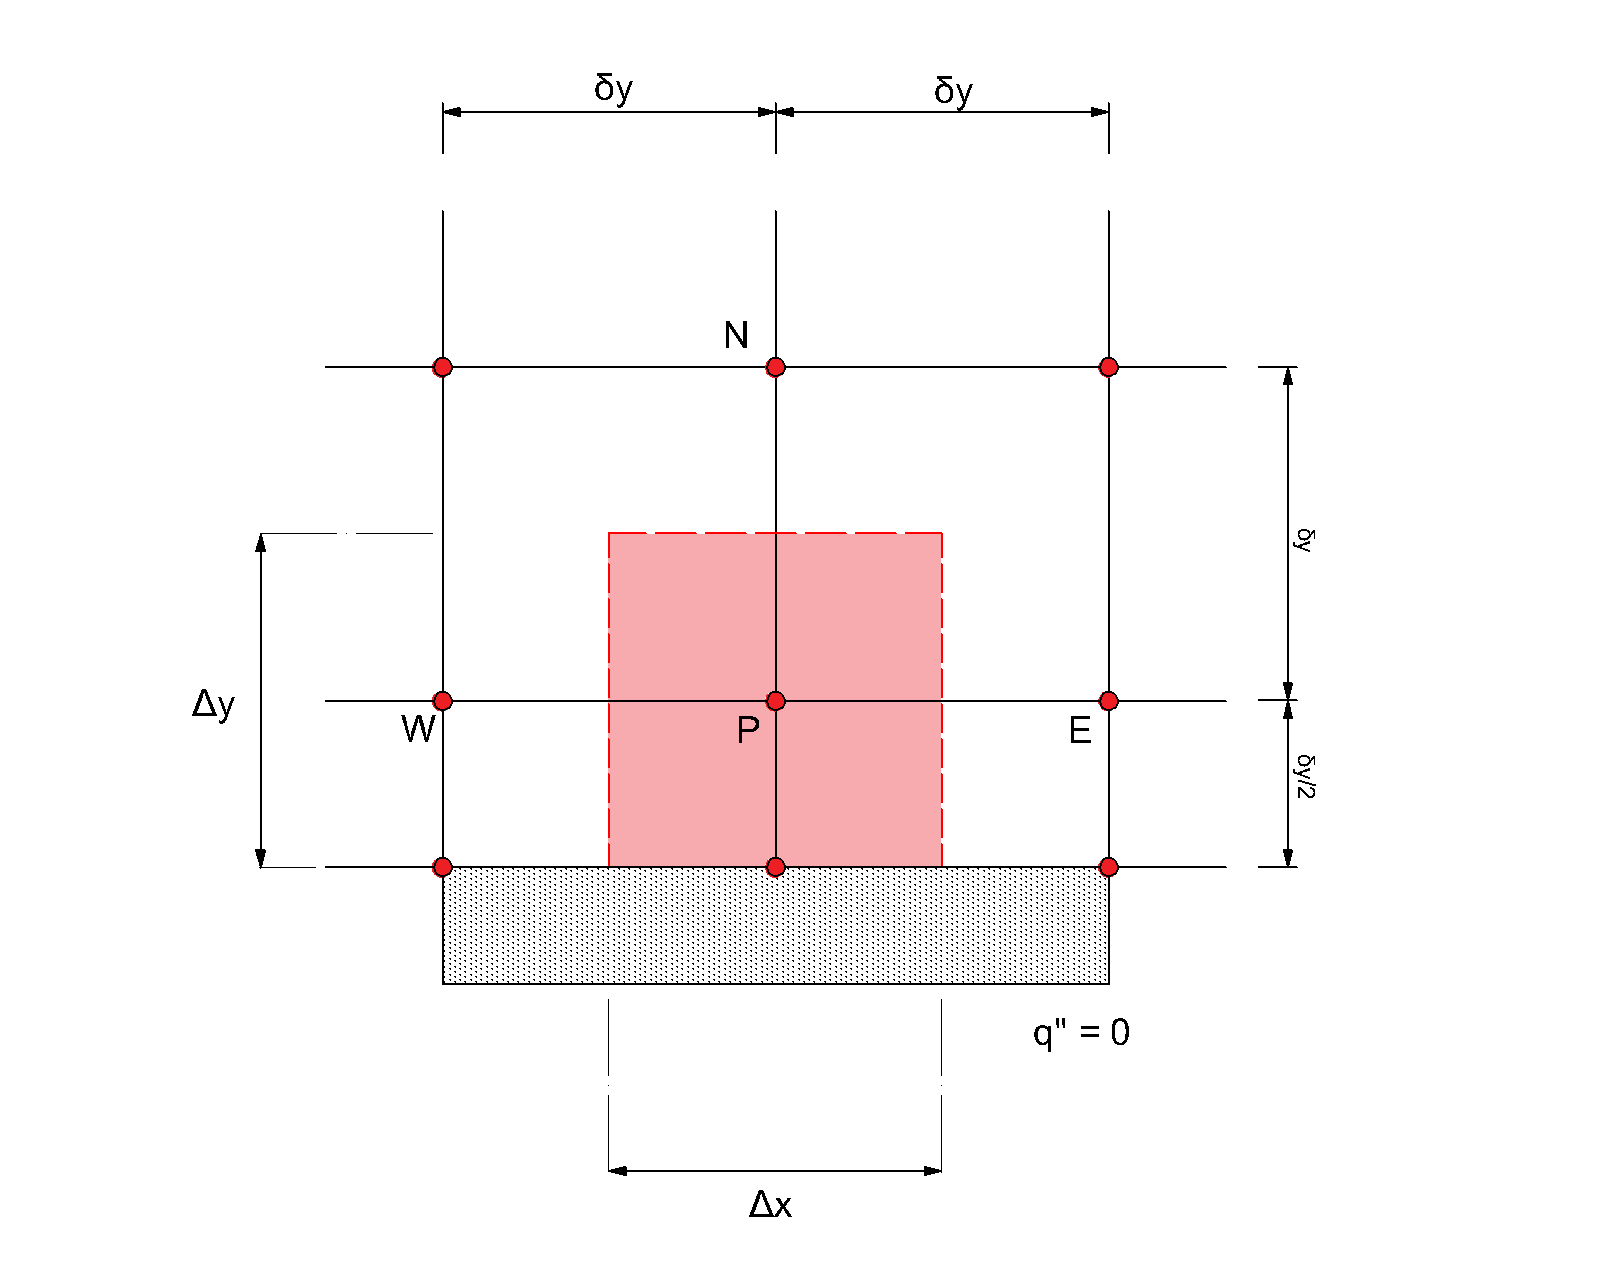

In [8]:
Image("isolado_sul.png", width = 500)

**1. Termo difusivo na direção x:**

$$k \, e \, \frac{ \Delta y}{2}\frac{(T_E - T_P)}{\Delta x} - k \, e \, \frac{\Delta y}{2} \frac{(T_P - T_W)}{\Delta x}$$


**2. Termo difusivo na direção y:**

$$ k \, e \, \frac{\Delta x}{\Delta y} (T_N - T_P) - 0 $$


Assim, o balanço de energia nos nós adjacentes à fronteira Sul fica:

$$ k \, e \, \frac{ \Delta y}{2} \left(\frac{T_E - T_P}{\Delta x}\right) - k \, e \, \frac{\Delta y}{2} \left(\frac{T_P - T_W}{\Delta x}\right) + k \, e \, \frac{\Delta x}{\Delta y} (T_N - T_P)= 0$$

Rearranjando os termos para obter o formato padrão:

$$\left( \frac{k \, e \, \Delta y}{2 \Delta x} + \frac{k \, e \, \Delta y}{2 \Delta x} + \frac{k \, e \, \Delta x}{ \Delta y} \right)T_P = \left(\frac{k \, e \, \Delta y}{2 \Delta x} \right) T_E + \left( \frac{k \, e \, \Delta y}{2 \Delta x}  \right)T_W + \left( \frac{k \, e \, \Delta x}{ \Delta y}  \right)T_N $$

A forma algébrica padrão do CFD é:

$$a_P T_P = a_E T_E + a_W T_W + a_N T_N $$

Onde os coeficientes são:

|Coeficiente| Expressão|
| --- | --- |
|    $a_P$ |   $\frac{k \, e \, \Delta y}{2 \Delta x} + \frac{k \, e \, \Delta y}{2 \Delta x} + \frac{k \, e \, \Delta x}{ \Delta y}$  |
| $a_N $| $\frac{k \, e \, \Delta x}{\Delta y}$ |
| $a_S$ | 0|
| $a_E$ e $a_W$| $\frac{k \, e \, \Delta y}{2 \Delta x}$ |

In [9]:
# Parâmetros físicos do problema
k = 1e3          # condutividade térmica W/(m.K)
q = 500e3        # fluxo de calor na face oeste W/m^2
T_norte = 100.0   # temperatura na face norte

# Parâmetros geométricos
e = 1e-2         # espessura
L, H = 1, 0.5    # largura, altura

# Parâmtros da malha
# Número de volumes de controle
nv_x = 10
nv_y = 5

# Número de nós em x e em y (volumes internos + 2 de fronteira)
n_nos_x = nv_x + 2
n_nos_y = nv_y + 2

# Comprimento dos nós em x e em y (malha uniforme)
dx = L / nv_x
dy = H / nv_y

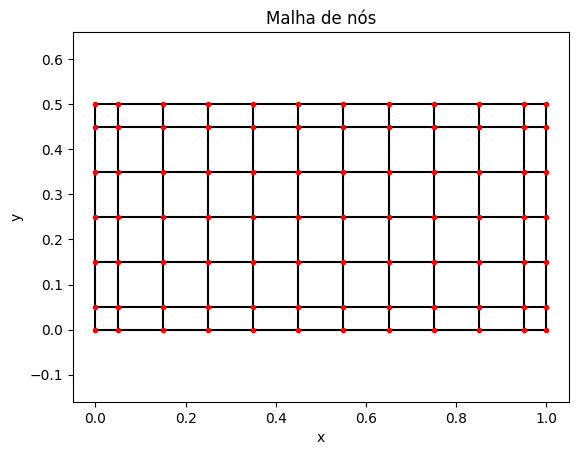

In [10]:
# Criando a malha

# Cordenadas na direção x
x_nodes = np.zeros(n_nos_x)
x_nodes[0] = 0               # Fronteira oeste (x = 0)
x_nodes[1] = dx/2            # Primeiro nó interno (a dx/2 da fronteira)

for i in range (2, n_nos_x - 2):
    x_nodes[i] = (dx/2) + (i - 1)*dx # Nós internos espaçados uniformemente

x_nodes[n_nos_x - 2] = L - (dx/2)   # Último nó interno
x_nodes[n_nos_x - 1] = L            # Fronteira leste (x = L)

# Cordenadas na direção y
y_nodes = np.zeros(n_nos_y)  # Fronteira sul (y = 0)
y_nodes[0] = 0               # Primeiro nó interno (a dy/2 da fronteira)
y_nodes[1] = dy/2
for i in range (2, n_nos_y - 2):
    y_nodes[i] = (dy/2) + (i - 1)*dy  # Nós internos espaçados uniformemente

y_nodes[n_nos_y - 2] = H - (dy/2)    # Último nó interno
y_nodes[n_nos_y - 1] = H             # Fronteira norte (y = H)

X, Y = np.meshgrid(x_nodes, y_nodes)

# Visualização da malha
# linhas verticais
for i in range(X.shape[1]):
    plt.plot(X[:, i], Y[:, i], 'k-')

# linhas horizontais
for j in range(Y.shape[0]):
    plt.plot(X[j, :], Y[j, :], 'k-')

# Cálculo as distâncias reais entre nós adjacentes
# Necessário porque temos um VC de dx/2 nas fronteiras

# Distâncias na direção x
dxw = np.zeros(n_nos_x)   # Distância do nó i até o nó oeste (i-1)
dxe = np.zeros(n_nos_x)   # Distância do nó i até o nó leste (i+1)

for i in range(1, n_nos_x - 1):
    dxw[i] = x_nodes[i] - x_nodes[i-1] 
    dxe[i] = x_nodes[i+1] - x_nodes[i] 

dys = np.zeros(n_nos_y)   # Distância do nó j até o nó sul (j-1)
dyn = np.zeros(n_nos_y)   # Distância do nó j até o nó norte (j+1)

for j in range(1, n_nos_y - 1):
    dys[j] = y_nodes[j] - y_nodes[j-1]
    dyn[j] = y_nodes[j+1] - y_nodes[j]

# nós (opcional)
plt.plot(X, Y, 'ro', markersize=3)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Malha de nós")
plt.axis("equal")
#plt.savefig('malha_40x20.png', dpi=350)
plt.show()

In [11]:
def tdma(a, d, c, b):
    """
    Subrotina para o TDMA conforme descrito no Apêndice A

    Resolve: d[i]·T[i] + a[i]·T[i-1] + c[i]·T[i+1] = b[i]
    
    Parâmetros:
    -----------
    a : array
        Sub-diagonal (coeficiente de T[i-1])
    d : array
        Diagonal principal (coeficiente de T[i])
    c : array
        Super-diagonal (coeficiente de T[i+1])
    b : array
        Termo fonte (lado direito)
    
    Retorna:
    --------
    phi : array
        Solução do sistema (temperaturas)
    """
    n = len(d)
    dc = np.zeros(n)
    bc = np.zeros(n)
    phi = np.zeros(n)
    
    dc[0] = d[0]
    bc[0] = b[0]

    for i in range(1, n):
        e = a[i] / dc[i - 1]          # Fator de eliminação
        dc[i] = d[i] - e * c[i - 1]   # Atualiza diagonal
        bc[i] = b[i] - e * bc[i - 1]  # Atualiza termo fonte
    
    # Substituição retroativa
    phi[n - 1] = bc[n - 1] / dc[n - 1] # Último nó
    
    for i in range(n - 2, -1, -1):
        phi[i] = (bc[i] - c[i] * phi[i + 1]) / dc[i]
        
    return phi

In [12]:
# Inicialização da matriz de temperaturas
T = np.zeros((n_nos_y, n_nos_x))  # Inicializa com 0°C 
# T[j, i] representa a temperatura no nó (j, i)
# j: índice vertical (0=sul, n_nos_y-1=norte)
# i: índice horizontal (0=oeste, n_nos_x-1=leste)

# Inicializando vetores que armazenão os valores dos coeficientes 
aw = np.zeros((n_nos_y, n_nos_x))   # Coeficiente do vizinho oeste
ae = np.zeros((n_nos_y, n_nos_x))   # Coeficiente do vizinho leste
as_ = np.zeros((n_nos_y, n_nos_x))  # Coeficiente do vizinho sul
an = np.zeros((n_nos_y, n_nos_x))   # Coeficiente do vizinho norte
ap = np.zeros((n_nos_y, n_nos_x))   # Coeficiente do nó central
sc = np.zeros((n_nos_y, n_nos_x))   # Termo fonte constante
sp = np.zeros((n_nos_y, n_nos_x))   # Termo fonte linearizado (Sc = Sc + Sp·T_P)

for j in range(1, n_nos_y - 1):
    for i in range(1, n_nos_x - 1):
        # Coeficiente oeste: fluxo através da face oeste do volume
        aw[j, i] = k * dy * e / dxw[i] 

        # Coeficiente leste: fluxo através da face leste do volume
        ae[j, i] = k * dy * e / dxe[i]  

        # Coeficiente sul: fluxo através da face sul do volume
        as_[j, i] = k * dx * e / dys[j]  

        # Coeficiente norte: fluxo através da face norte do volume
        an[j, i] = k * dx * e / dyn[j]  


# Subrotina para os coeficientes de contorno  
for j in range (1, n_nos_y - 1): # Fronteiras de oeste a leste
    sc[j, 1] += q * (dy * e)     # Neumann a oeste: q" = 500 kW/m^2
    aw[j, 1] = 0                 # Não há nó a oeste do primeiro interno
    ae[j, n_nos_x - 2] = 0       # Leste isolado

for i in range (1, n_nos_x - 1):  # Fronteiras sul e norte
    sc[n_nos_y - 2, i] += an[n_nos_y - 2, i] * T_norte  # Adiciona termo conhecido
    sp[n_nos_y - 2, i] -= an[n_nos_y - 2, i]            # Lineariza (move para aP)
    an[n_nos_y - 2, i] = 0                              # Anula coeficiente norte
    as_[1,i] = 0                                        # Sul isolado

# Subrotina para os coeficientes aP
for j in range (1, n_nos_y - 1):
    for i in range (1, n_nos_x - 1):
        ap[j, i] = aw[j, i] + ae[j, i] + as_[j, i] + an[j, i] - sp[j, i]

# Subrotina para resolução do sistema 2D alternando entre varreduras horizontais e verticais
# Cada varredura resolve sistemas tridiagonais 1D usando TDMA
# Loop de Iteração
max_iter = 5e3  # Número máximo de iterações
tol = 1e-8      # Tolerância de convergência (mudança máxima em T)

for it in range(int(max_iter)):
    T_old = T.copy()  # Salva temperaturas da iteração anterior

    # Varredura Horizontal
    # Para cada linha j, resolve um sistema tridiagonal em x
    # Mantém as temperaturas das linhas j-1 e j+1 fixas (da iteração anterior)

    for j in range(1, n_nos_y - 1):  # Removido o enumerate aqui
        # Preparar sistema tridiagonal para a linha j
        a_t = np.zeros(n_nos_x - 2)  # Sub-diagonal
        d_t = np.zeros(n_nos_x - 2)  # Diagonal principal
        c_t = np.zeros(n_nos_x - 2)  # Super-diagonal
        b_t = np.zeros(n_nos_x - 2)  # Termo fonte

        for i_idx, i in enumerate(range(1, n_nos_x - 1)):
            a_t[i_idx] = -aw[j, i]   # Coeficiente de T[j, i-1]
            d_t[i_idx] = ap[j, i]    # Coeficiente de T[j, i]
            c_t[i_idx] = -ae[j, i]   # Coeficiente de T[j, i+1]

            # Termo fonte inclui contribuições dos vizinhos sul e norte (fixos)
            b_t[i_idx] = as_[j, i] * T[j - 1, i] + an[j, i] * T[j + 1, i] + sc[j, i]

        # Resolver sistema tridiagonal e atualizar temperaturas da linha j
        T[j, 1:n_nos_x-1] = tdma(a_t, d_t, c_t, b_t)

    # Varredura Vertical
    # Para cada coluna i, resolve um sistema tridiagonal em y
    # Mantém as temperaturas das colunas i-1 e i+1 fixas (recém atualizadas)

    for i in range(1, n_nos_x - 1):
        # Preparar sistema tridiagonal para a coluna i
        a_t = np.zeros(n_nos_y - 2)
        d_t = np.zeros(n_nos_y - 2)
        c_t = np.zeros(n_nos_y - 2)
        b_t = np.zeros(n_nos_y - 2)
        
        for j_idx, j in enumerate(range(1, n_nos_y - 1)):
            a_t[j_idx] = -as_[j, i]
            d_t[j_idx] = ap[j, i]
            c_t[j_idx] = -an[j, i]
            b_t[j_idx] = aw[j, i] * T[j, i - 1] + ae[j, i] * T[j, i + 1] + sc[j, i]
        
        # Resolver sistema tridiagonal e atualizar temperaturas da coluna i
        T[1:n_nos_y-1, i] = tdma(a_t, d_t, c_t, b_t)

    # Subrotina Condições de Contorno (Atualização dos nós de fronteira)
    # Os nós de fronteira são atualizados após cada varredura completa

    # NORTE: Temperatura prescrita (Dirichlet)
    T[n_nos_y-1, :] = T_norte

    for j in range(n_nos_y - 1):
        T[j, 0] = q * dxw[1] / k + T[j, 1]    # OESTE: Fluxo de calor (Neumann) - extrapolação usando Lei de Fourier
        T[j, n_nos_x - 1] = T[j, n_nos_x - 2] # LESTE: Isolado (Neumann, dT/dx = 0) - extrapolação de primeira ordem
    
    # SUL: Isolado (Neumann, dT/dy = 0) - extrapolação de primeira ordem
    for i in range(n_nos_x):
        T[0, i] = T[1, i]

    if np.max(np.abs(T - T_old)) < tol:
        print(f"Convergência em {it} iterações.")
        break

Convergência em 101 iterações.


In [13]:
print("=" * 80)
print("MATRIZ DE TEMPERATURAS (°C)")
print("=" * 80)

# Criando uma matriz com as temperaturas
df_temp = pd.DataFrame(T, 
                       columns=[f'{x_nodes[i]:.3f}' for i in range(n_nos_x)],
                       index=[f'{y_nodes[j]:.3f}' for j in range(n_nos_y)])
df_temp = df_temp.iloc[::-1]

# Exportando para Excel
#df_temp.to_excel('temperaturas_40x20.xlsx', 
#                 sheet_name='Temperaturas',
#                 float_format='%.1f',
#                index=True,           
#                 header=True,          
#                 startrow=1,           
#                 startcol=1)           

print("\nCoordenadas: Colunas = x (m), Linhas = y (m)\n")
print(df_temp.to_string(float_format=lambda x: f'{x:.1f}'))
print("\n" + "=" * 80)

MATRIZ DE TEMPERATURAS (°C)

Coordenadas: Colunas = x (m), Linhas = y (m)

       0.000  0.050  0.150  0.250  0.350  0.450  0.550  0.650  0.750  0.850  0.950  1.000
0.500  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0
0.450  167.9  142.9  125.0  116.5  111.6  108.4  106.2  104.7  103.8  103.2  102.9  102.9
0.350  221.5  196.5  165.5  145.9  132.9  124.1  118.0  113.7  110.9  109.2  108.3  108.3
0.250  256.1  231.1  194.6  168.6  150.2  137.1  127.8  121.3  117.0  114.3  113.0  113.0
0.150  277.2  252.2  213.3  183.9  162.1  146.2  134.8  126.8  121.3  118.0  116.4  116.4
0.050  287.3  262.3  222.3  191.5  168.2  151.0  138.5  129.6  123.6  119.9  118.1  118.1
0.000  287.3  262.3  222.3  191.5  168.2  151.0  138.5  129.6  123.6  119.9  118.1  118.1



## Distribuição de temperatura ao longo da placa

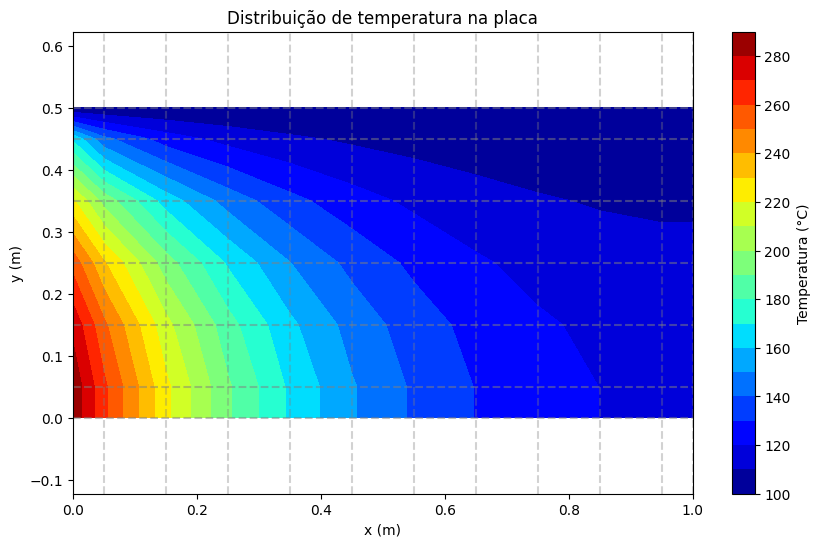

In [14]:
X, Y = np.meshgrid(x_nodes, y_nodes)
plt.figure(figsize=(10,6),dpi=100)
cp = plt.contourf(X, Y, T, 20, cmap='jet')
plt.colorbar(cp, label='Temperatura (°C)')

# Plotar a malha
for i in range(n_nos_x):
    plt.axvline(x_nodes[i], color='gray', linestyle='--', alpha=0.35)
for j in range(n_nos_y):
    plt.axhline(y_nodes[j], color='gray', linestyle='--', alpha=0.5)

plt.title('Distribuição de temperatura na placa')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis('equal')
#plt.savefig('Dist_Temp_40x20.png',dpi=350)
plt.show()

 ## Temperatura intermediária na placa
 
Nesta seção, foram propostos dois gráficos contendo a distribuição da temperatura nos nós intermédiarios da placa.

- No primeiro caso, fixou-se a altura y em 0,25 m e varreu-se a temperatura ao longo de x;

- No segundo caso, fixou-se a largura x em 0,55 m e varreu-se a temperatura ao longo de y.

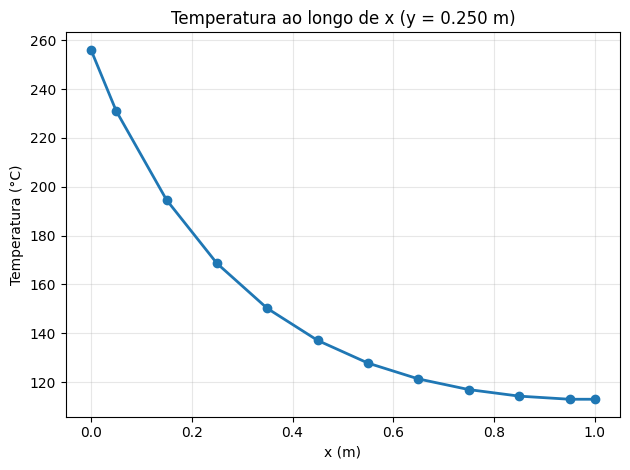

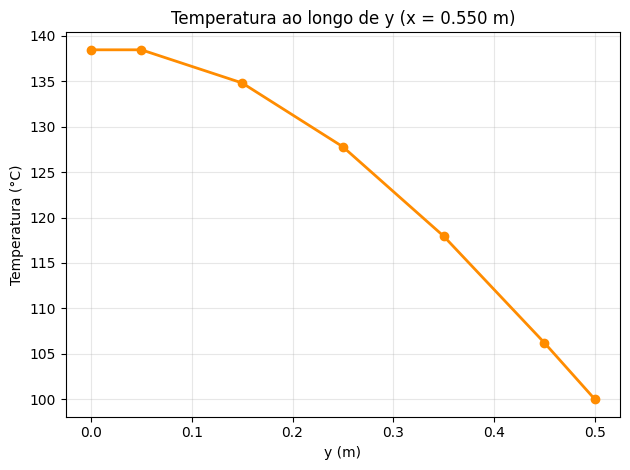

In [15]:
# Gráfico de temperatura ao longo de x (com y fixo em 0,25 m)
plt.figure()
mid_y_idx = n_nos_y // 2
plt.plot(x_nodes, T[mid_y_idx, :], '-o', linewidth=2, markersize=6)
plt.title(f'Temperatura ao longo de x (y = {y_nodes[mid_y_idx]:.3f} m)')
plt.xlabel('x (m)')
plt.ylabel('Temperatura (°C)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig('temperatura_linha_central_40x20.png', dpi=300)
plt.show()

# Gráfico de temperatura ao longo de y (com x fixado em 0,55 m)
plt.figure()
mid_x_idx = n_nos_x // 2
plt.plot(y_nodes, T[:, mid_x_idx], 'o-',color='#FF8C00', linewidth=2, markersize=6)
plt.title(f'Temperatura ao longo de y (x = {x_nodes[mid_x_idx]:.3f} m)')
plt.xlabel('y (m)')
plt.ylabel('Temperatura (°C)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig('temperatura_linha_vertical_40x20.png', dpi=300)
plt.show()

## Gráfico tridimensional da distribuição da temperatura

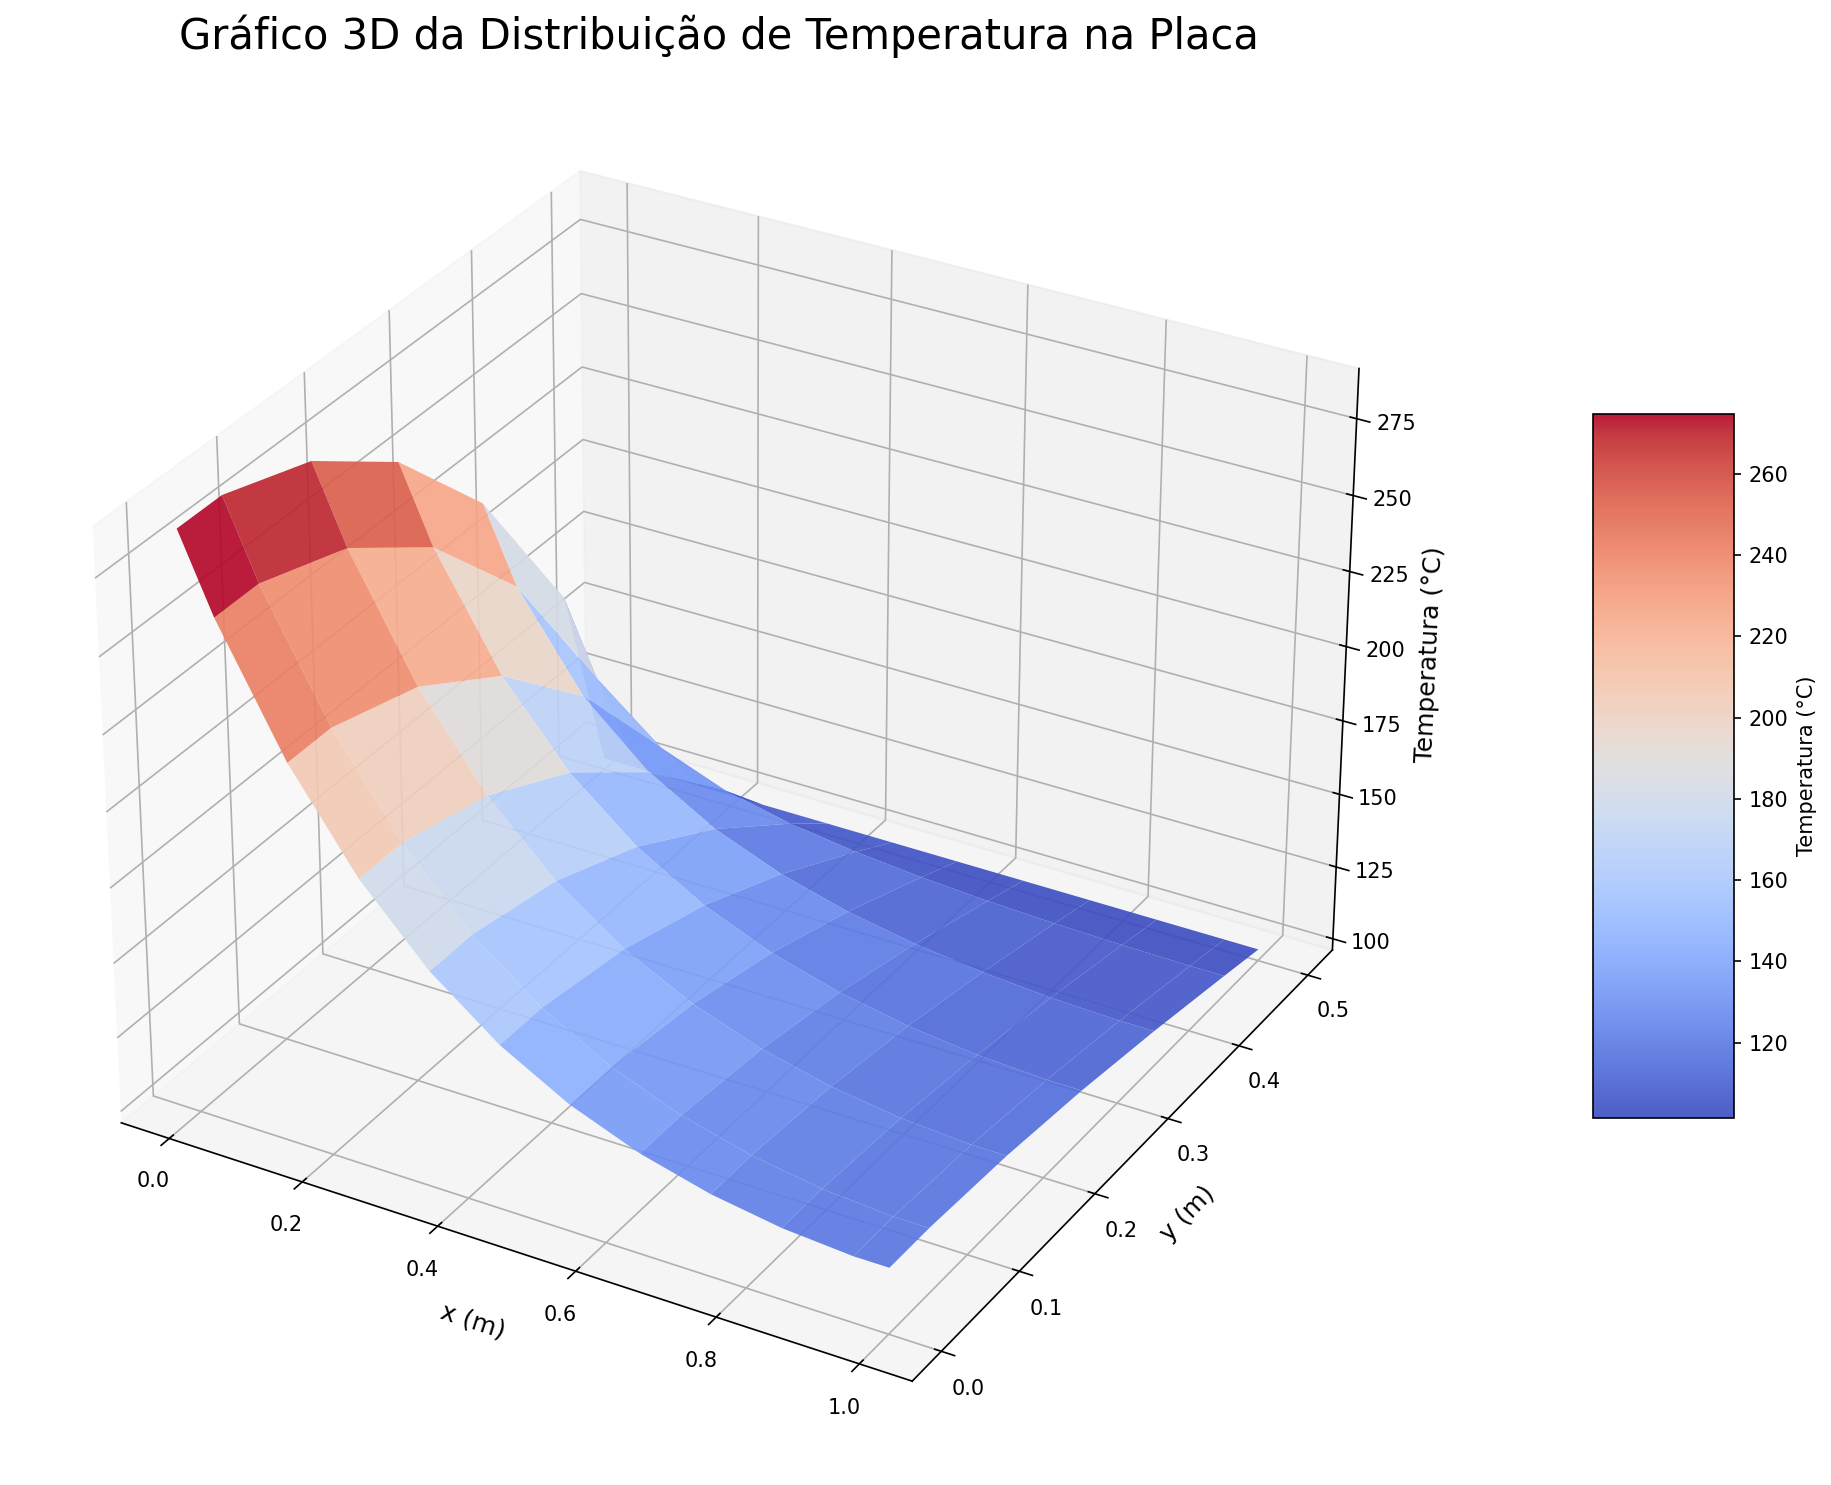

In [16]:
# Criar meshgrid para o gráfico 3D
X_3d, Y_3d = np.meshgrid(x_nodes, y_nodes)

# Gráfico 3D da distribuição de temperatura
fig = plt.figure(figsize=(23,10),dpi=(150))
ax = fig.add_subplot(111, projection='3d')

# Plotar a superfície
surf = ax.plot_surface(X_3d, Y_3d, T, antialiased=True, cmap=cm.coolwarm, 
                       edgecolor='none', alpha=0.9)

# Adicionar barra de cores
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Temperatura (°C)')

# Configurar labels e título
ax.set_title('Gráfico 3D da Distribuição de Temperatura na Placa', fontsize=20)
ax.set_xlabel('x (m)', fontsize=12)
ax.set_ylabel('y (m)', fontsize=12)
ax.set_zlabel('Temperatura (°C)', fontsize=12)
plt.tight_layout()
#plt.savefig('Distribuição_3d_40x20.png',dpi=350)
plt.show()

## Refinamento da Malha

A fim de promover uma melhora nos resultados, tornando-os mais precisos, foi proposto um refinamento da malha computacional. Assim, ela passou a ter **40x20 volumes de controle**, como segue abaixo:

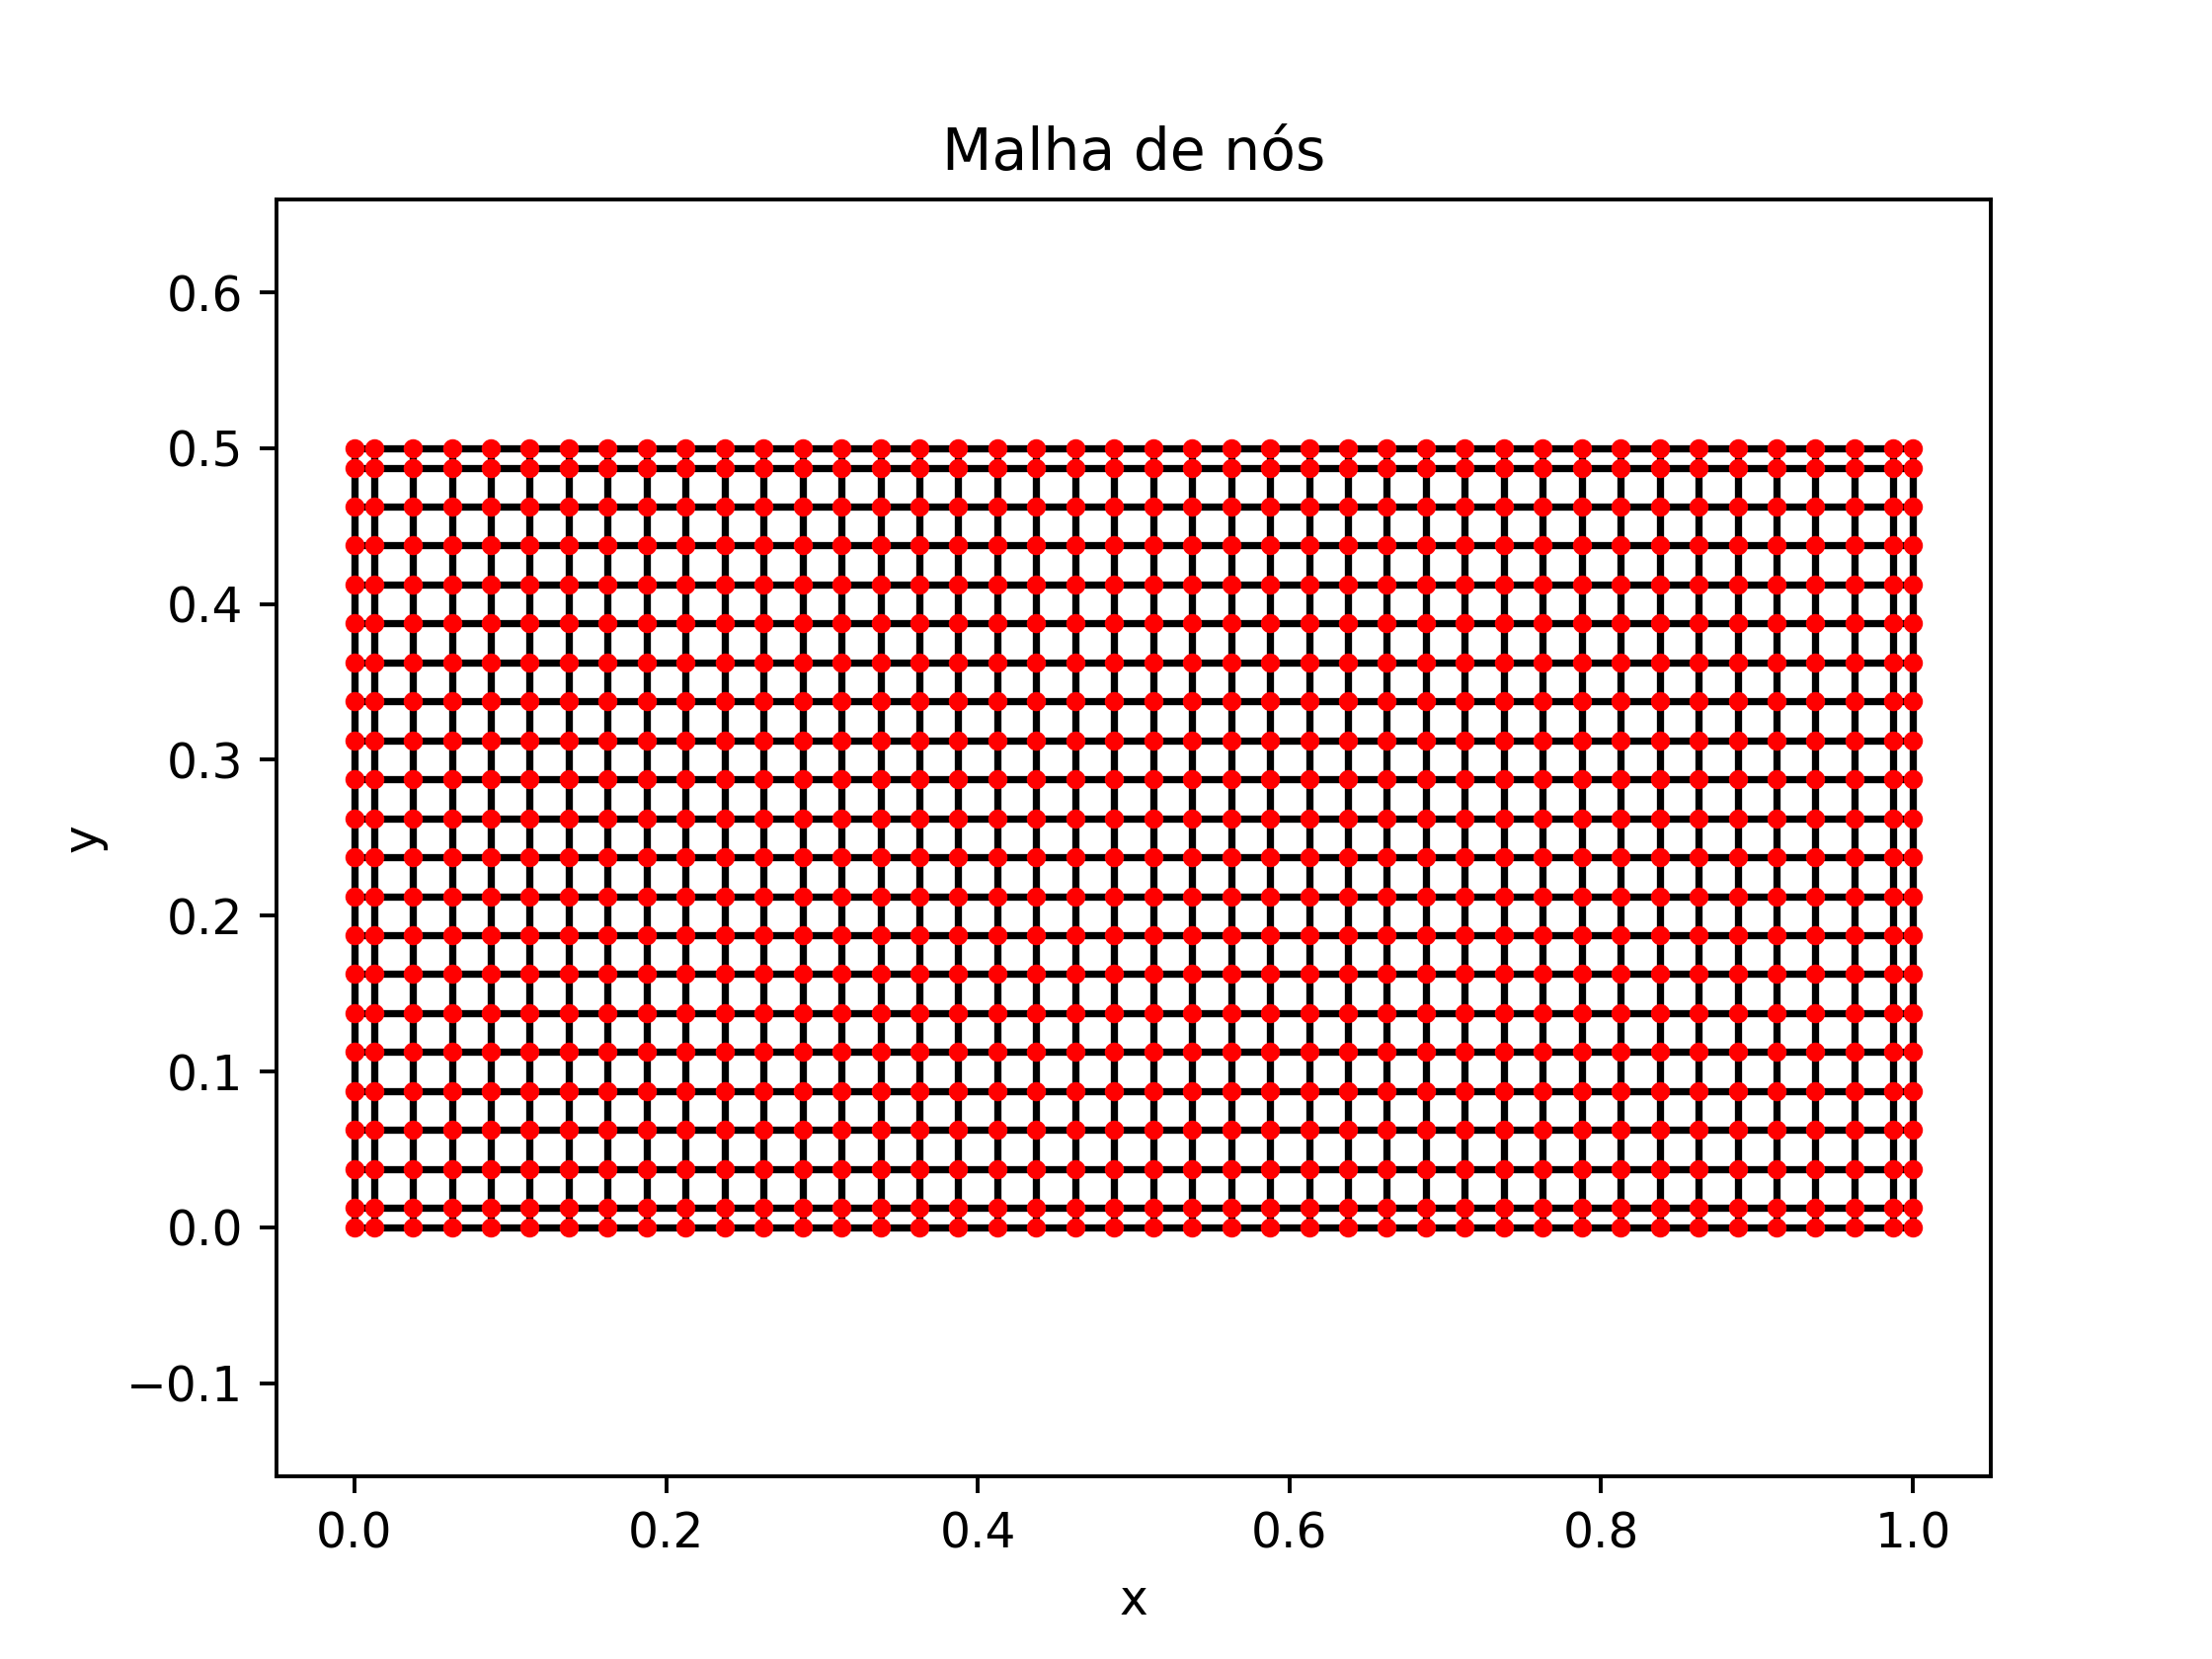

In [17]:
Image('malha_40x20.png',width=600)

A simulação considerando esse cenário e os resultados foram salvos e serão exibidos a seguir. A distribuição de temperatura encontrada está exibida na matriz abaixo e posteriormente no gráfico:

In [18]:
df = pd.read_excel('temperaturas_40x20.xlsx')
df = df.drop(columns=['Unnamed: 0'])
df.columns = range(len(df.columns))
df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,NaN,0.0,0.013,0.038,0.062,0.088,0.113,0.138,0.163,0.188,...,0.787,0.812,0.838,0.863,0.887,0.912,0.938,0.963,0.988,1.0
1,0.500,100.0,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,...,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.0
2,0.487,122.5,116.200,111.700,109.400,108.000,107.000,106.200,105.600,105.000,...,100.900,100.800,100.800,100.800,100.700,100.700,100.700,100.700,100.700,100.7
3,0.463,146.9,140.700,132.800,127.500,123.700,120.800,118.500,116.600,115.000,...,102.500,102.400,102.300,102.300,102.200,102.100,102.100,102.100,102.100,102.1
4,0.438,166.9,160.600,151.200,144.000,138.500,134.000,130.400,127.400,124.800,...,104.200,104.000,103.900,103.800,103.700,103.600,103.500,103.500,103.400,103.4
5,0.413,183.8,177.500,167.300,158.900,152.100,146.500,141.700,137.700,134.200,...,105.900,105.600,105.400,105.200,105.100,105.000,104.900,104.800,104.800,104.8
6,0.388,198.4,192.100,181.400,172.300,164.600,158.000,152.400,147.400,143.100,...,107.500,107.200,106.900,106.700,106.500,106.300,106.200,106.100,106.100,106.1
7,0.363,211.2,205.000,194.000,184.300,176.000,168.600,162.200,156.600,151.600,...,109.100,108.700,108.300,108.100,107.800,107.600,107.500,107.400,107.400,107.4
8,0.338,222.6,216.400,205.100,195.100,186.200,178.400,171.300,165.100,159.500,...,110.600,110.100,109.700,109.400,109.100,108.900,108.800,108.700,108.600,108.6
9,0.313,232.7,226.500,215.100,204.800,195.500,187.200,179.700,172.900,166.800,...,112.000,111.500,111.100,110.700,110.400,110.100,110.000,109.800,109.800,109.8


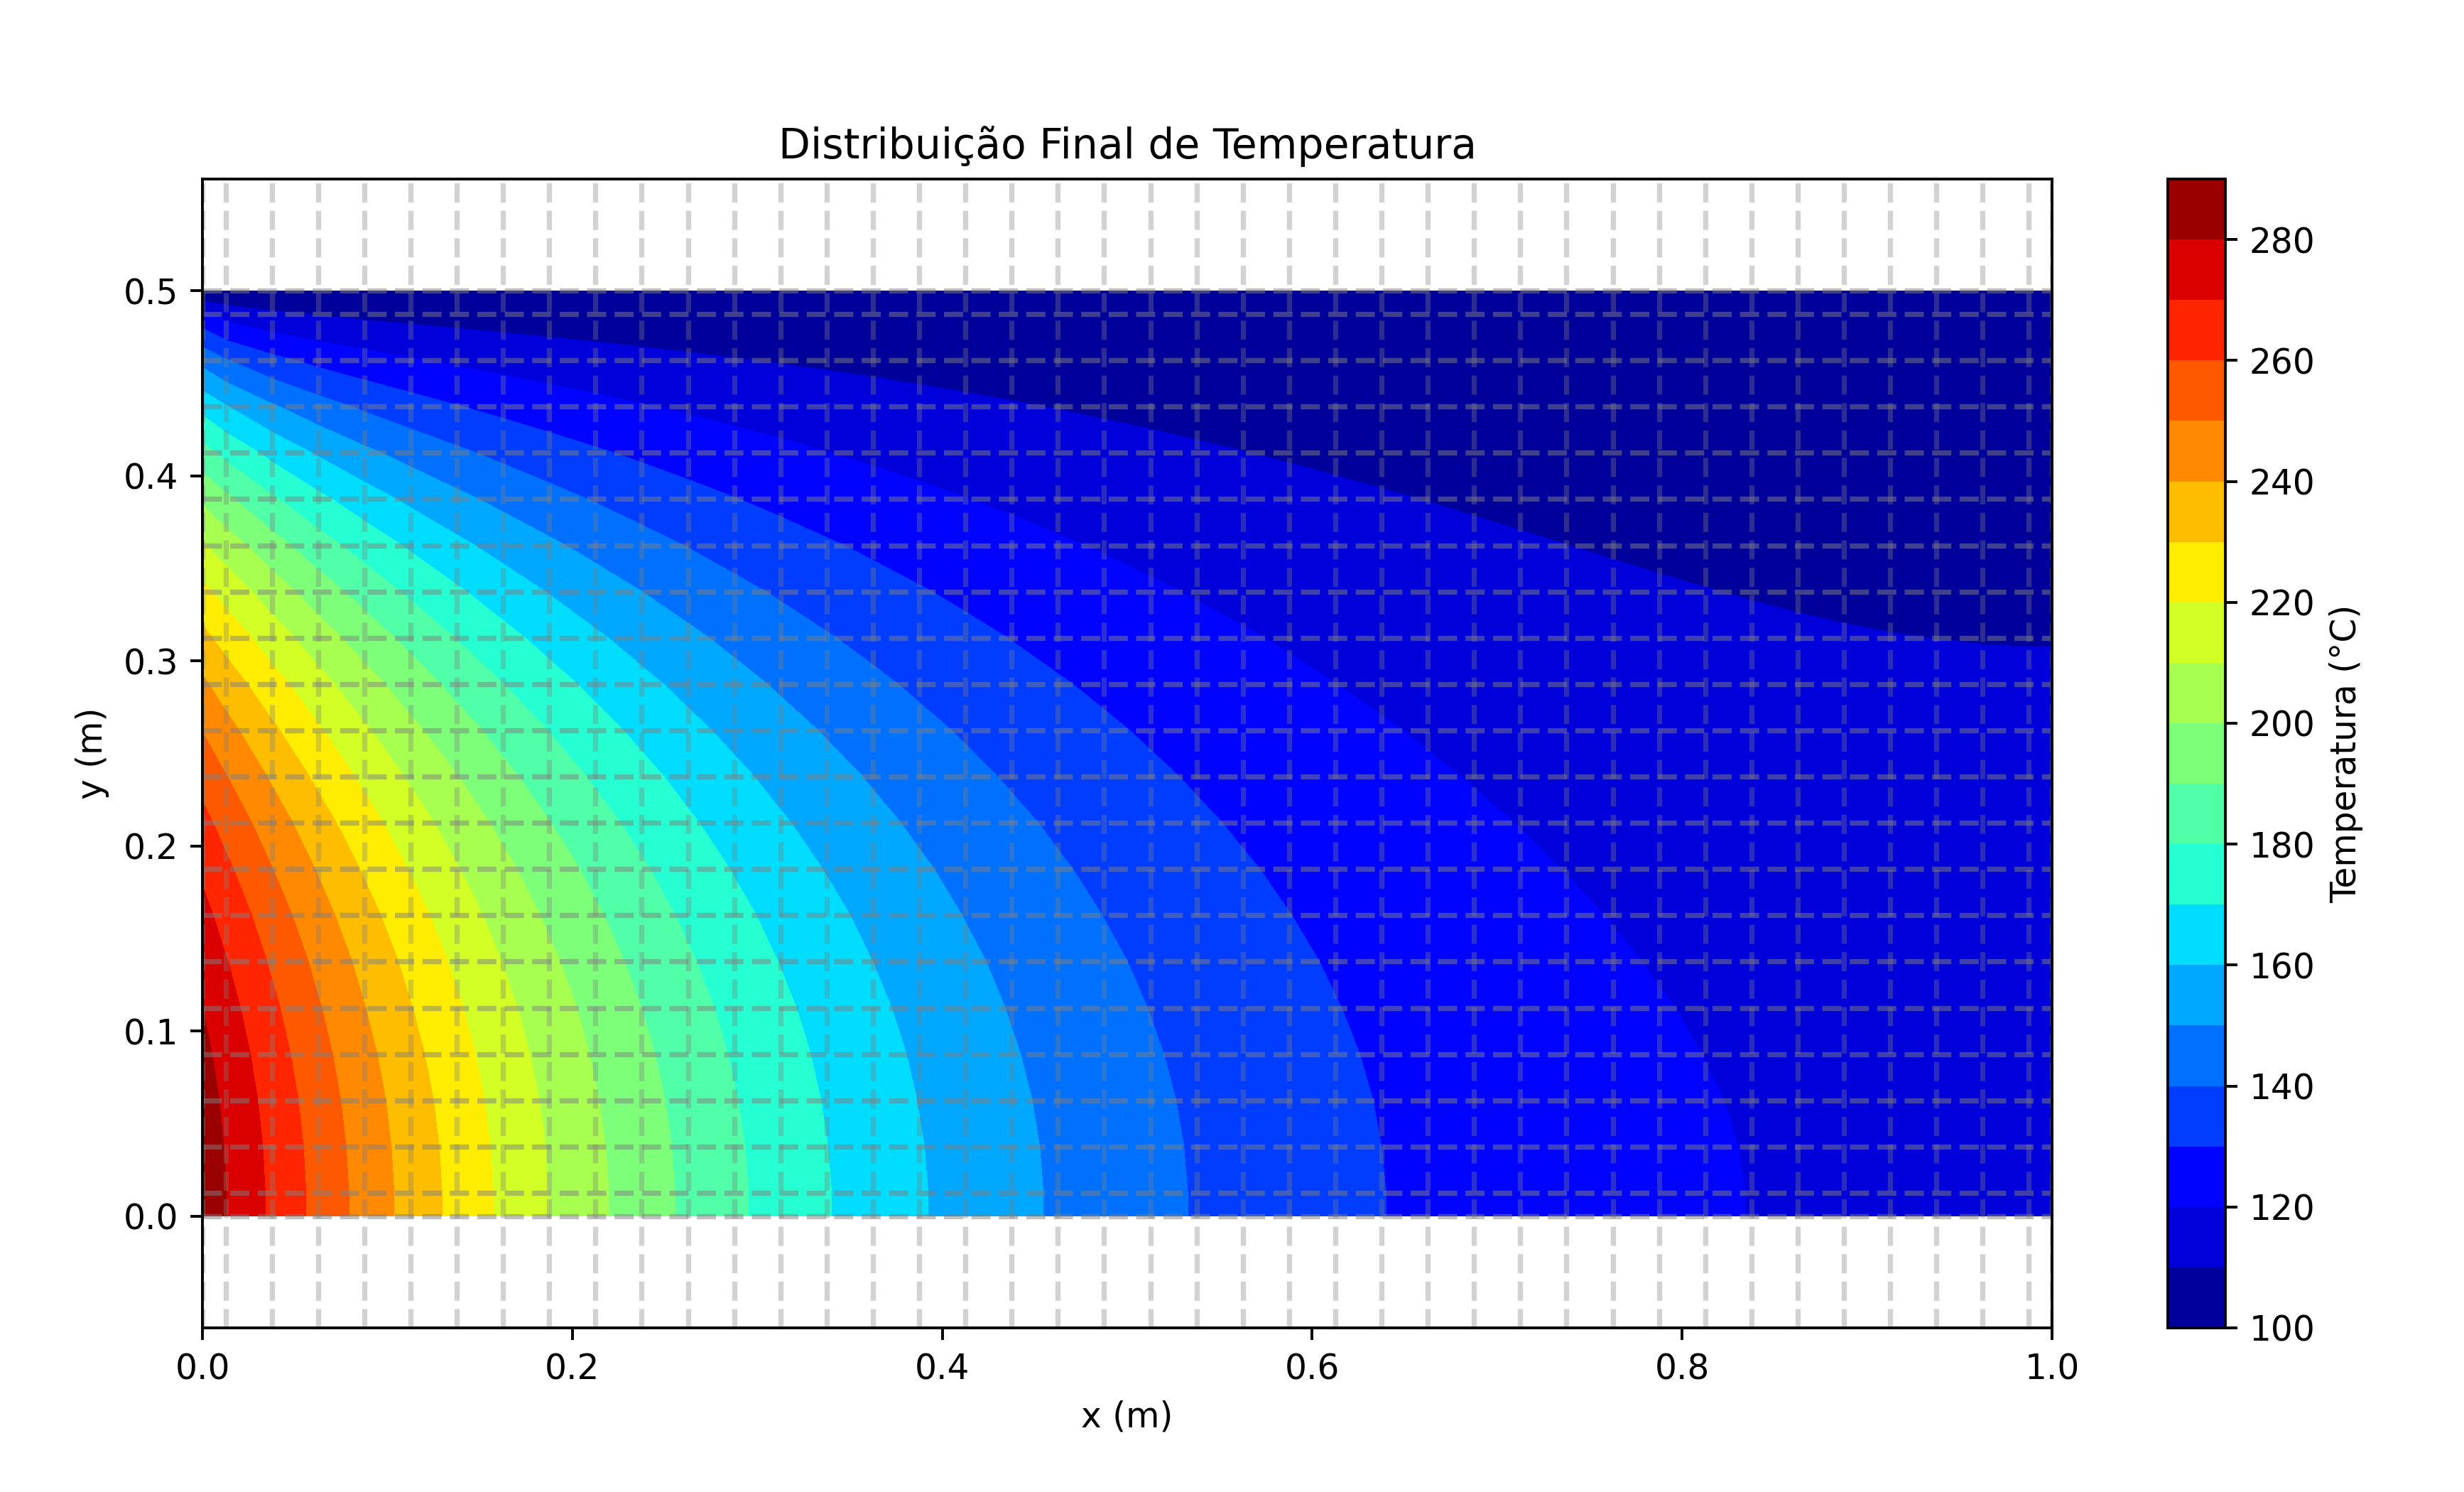

In [19]:
Image('Dist_Temp_40x20.png', width=800)

#### - Distribuição de temperatura ao longo de x com y fixo em 0,263 m:

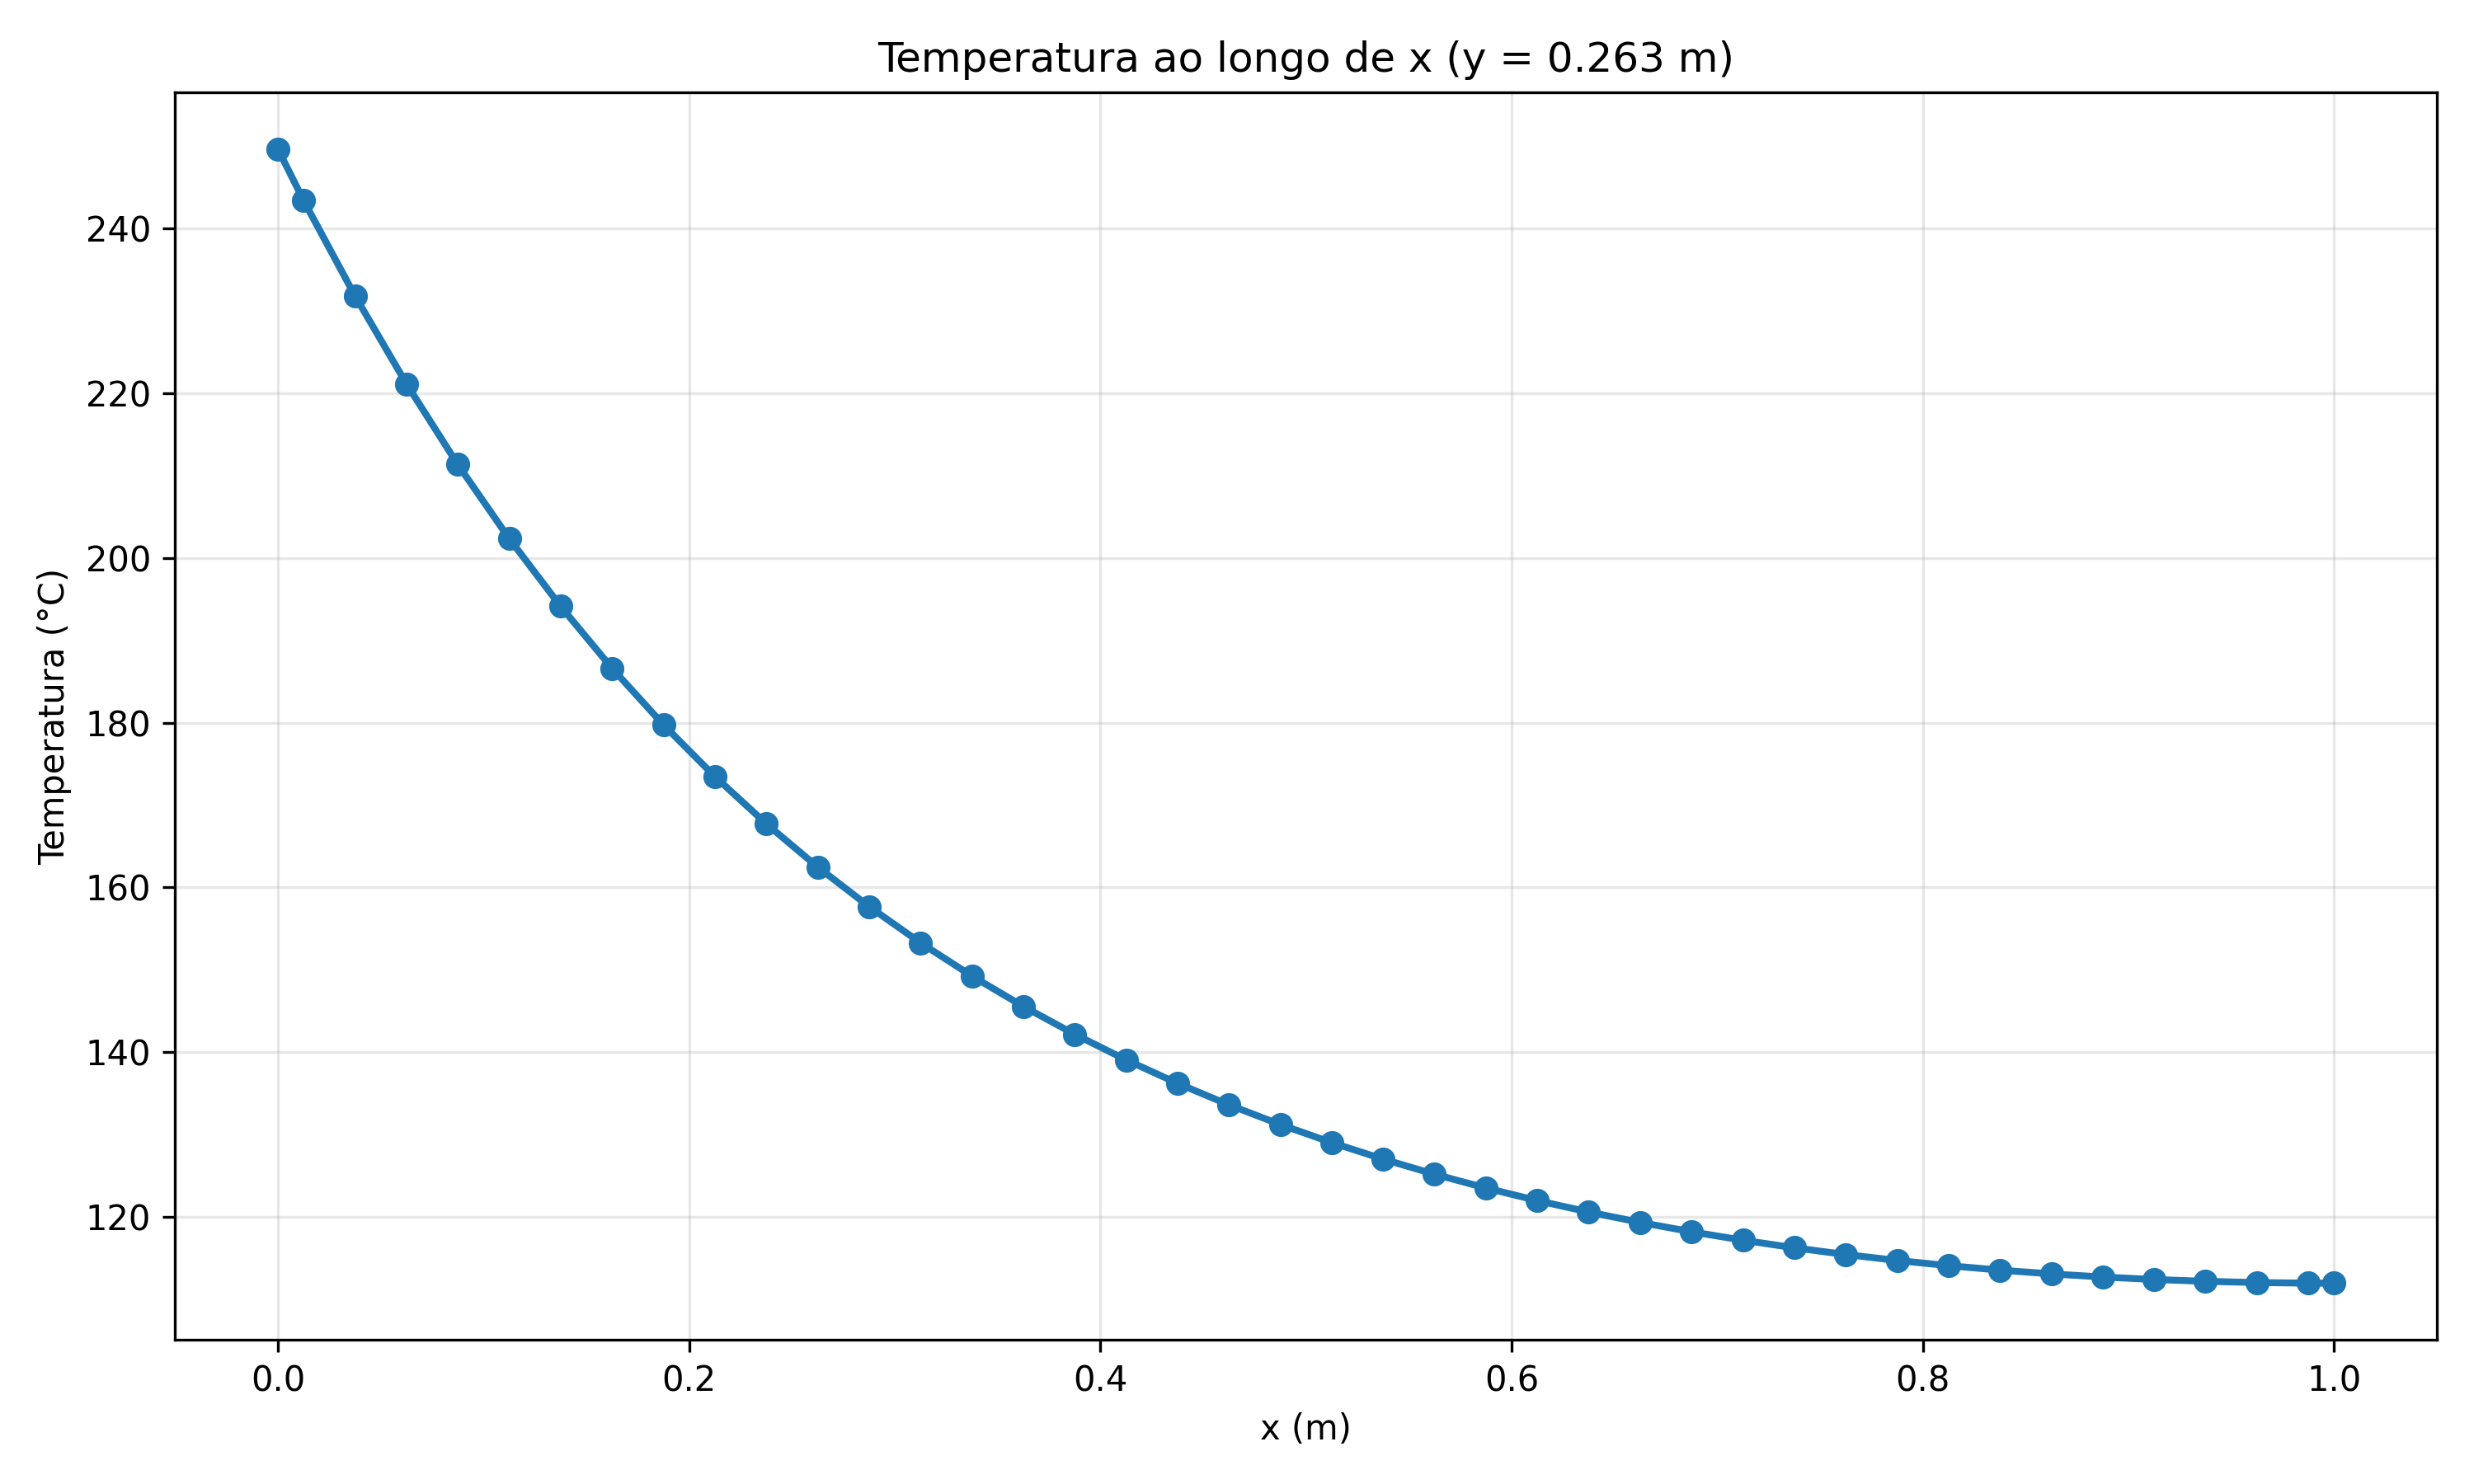

In [20]:
Image('temperatura_linha_central_40x20.png',width=600)

#### - Distribuição de temperatura ao longo de y com x fixo em 0,512 m:

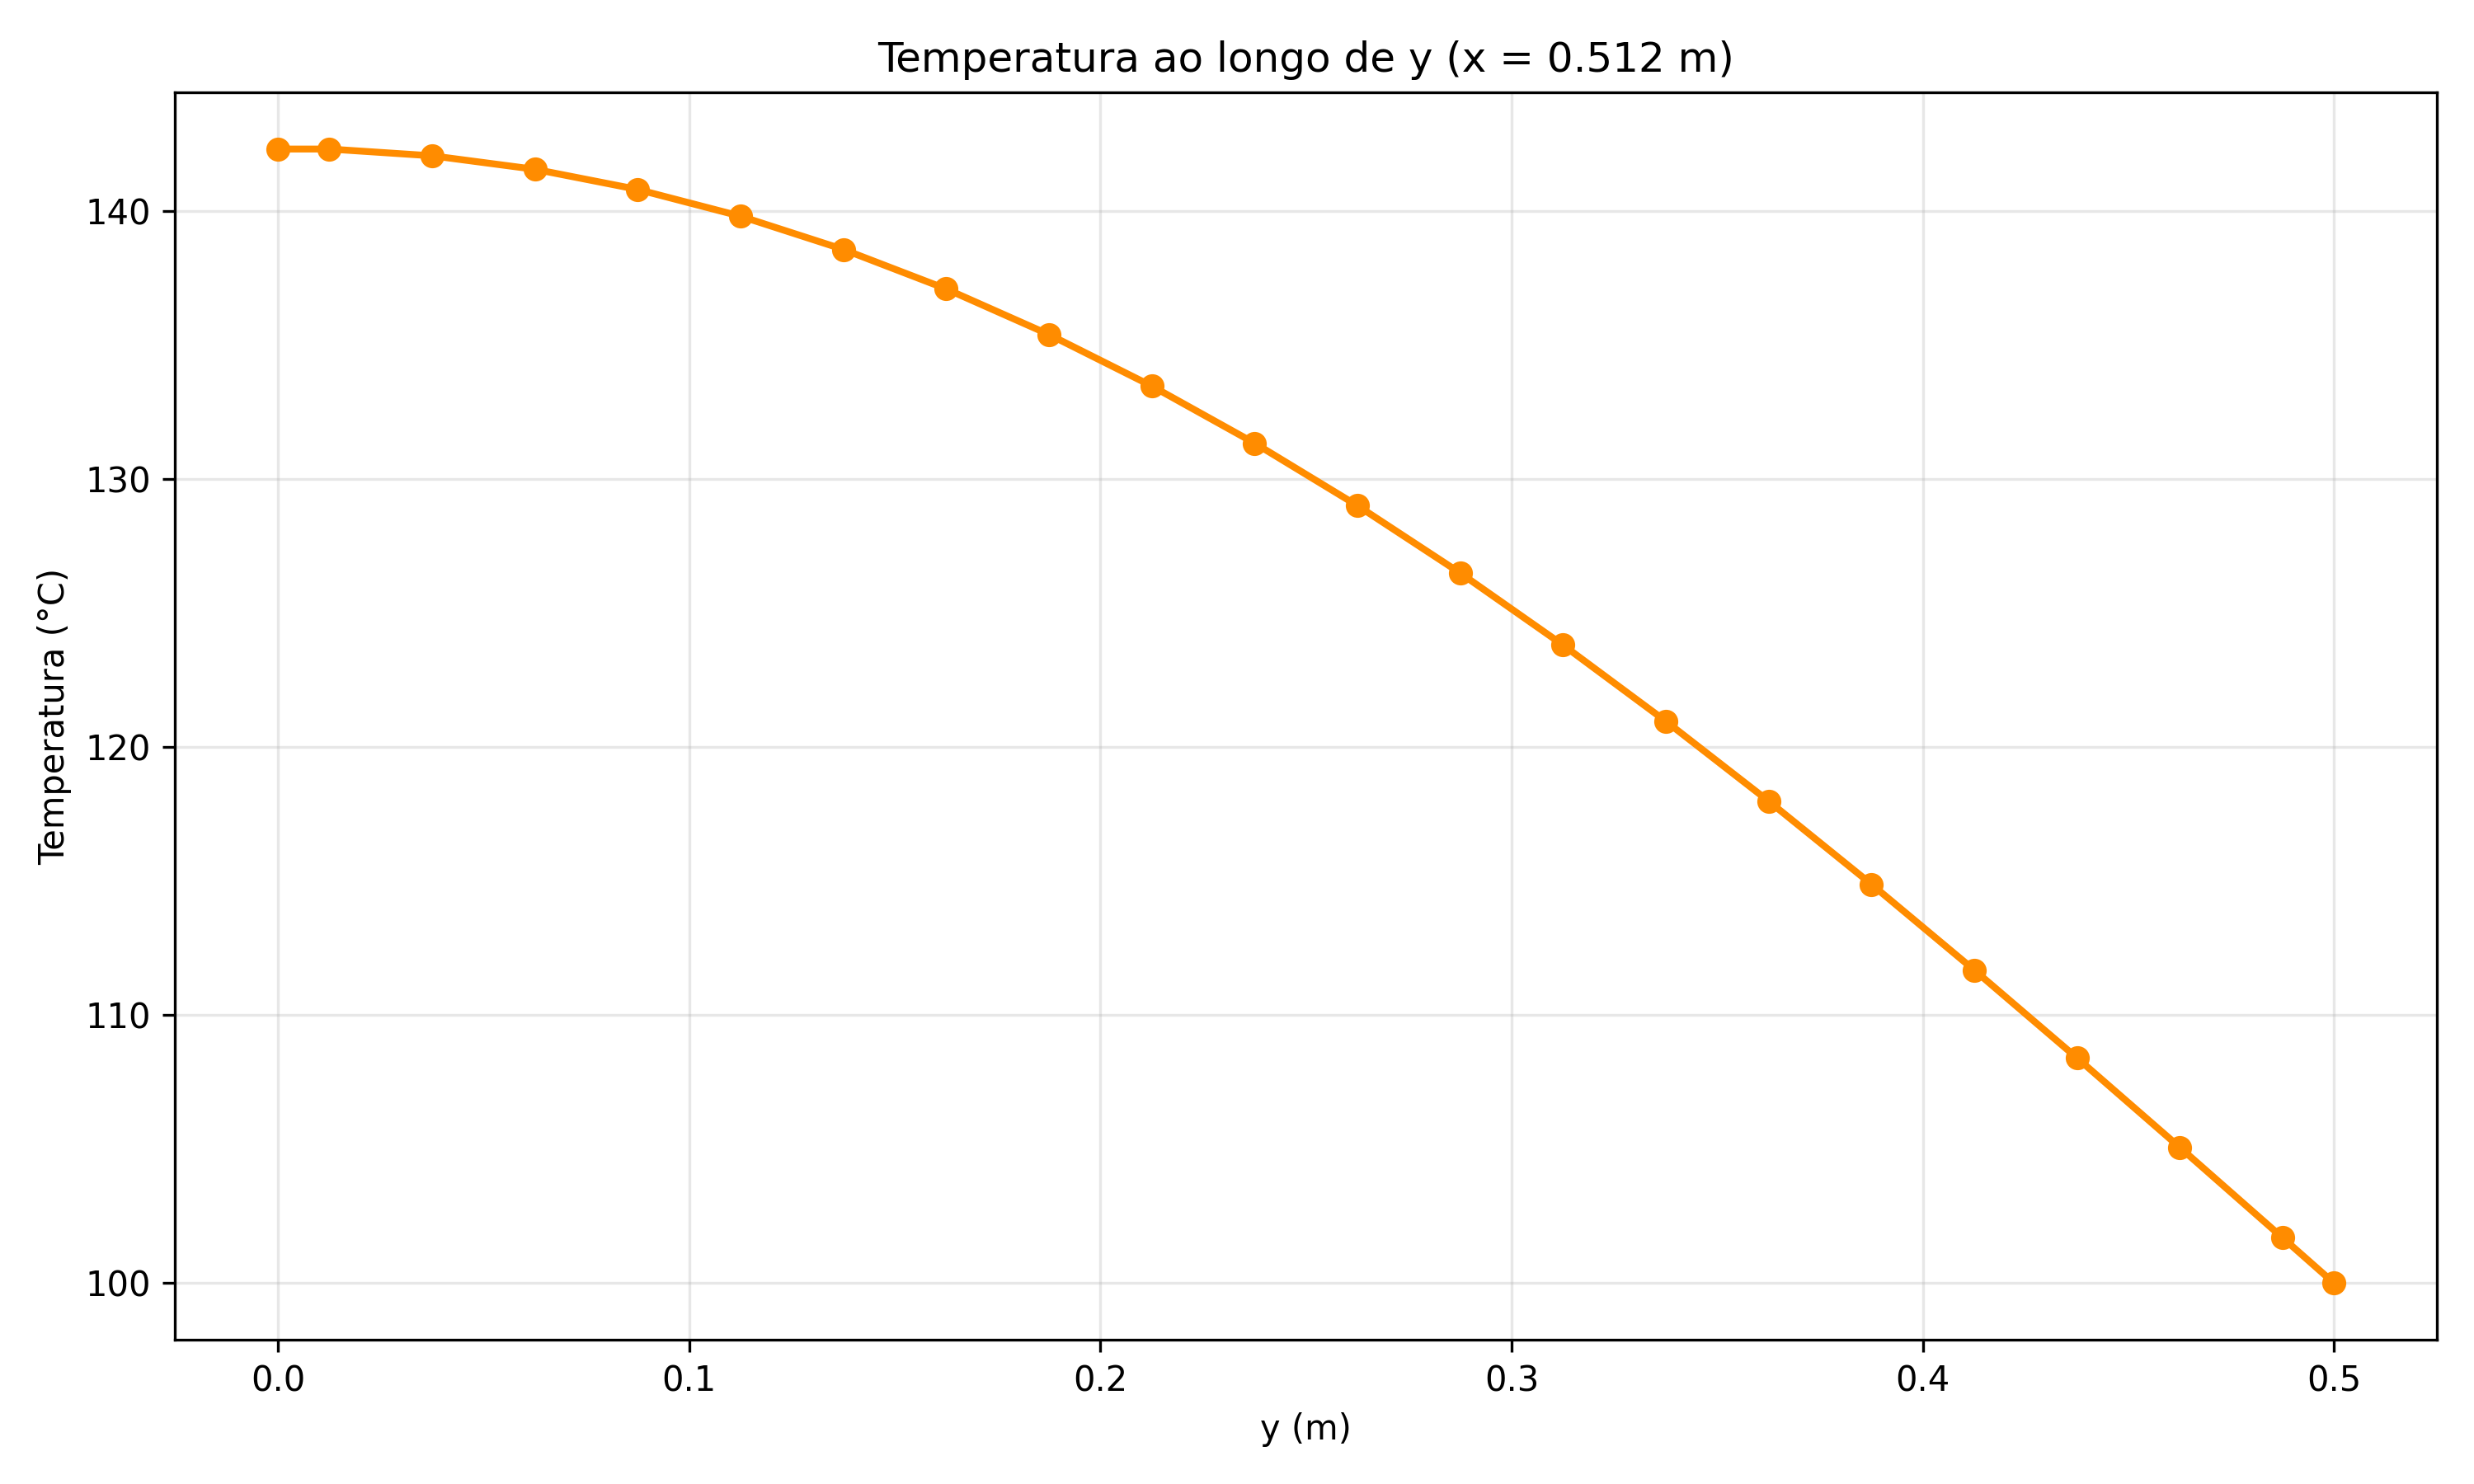

In [21]:
Image('temperatura_linha_vertical_40x20.png',width=600)

#### - Gráfico tridimensional da distribuição da temperatura ao longo da placa

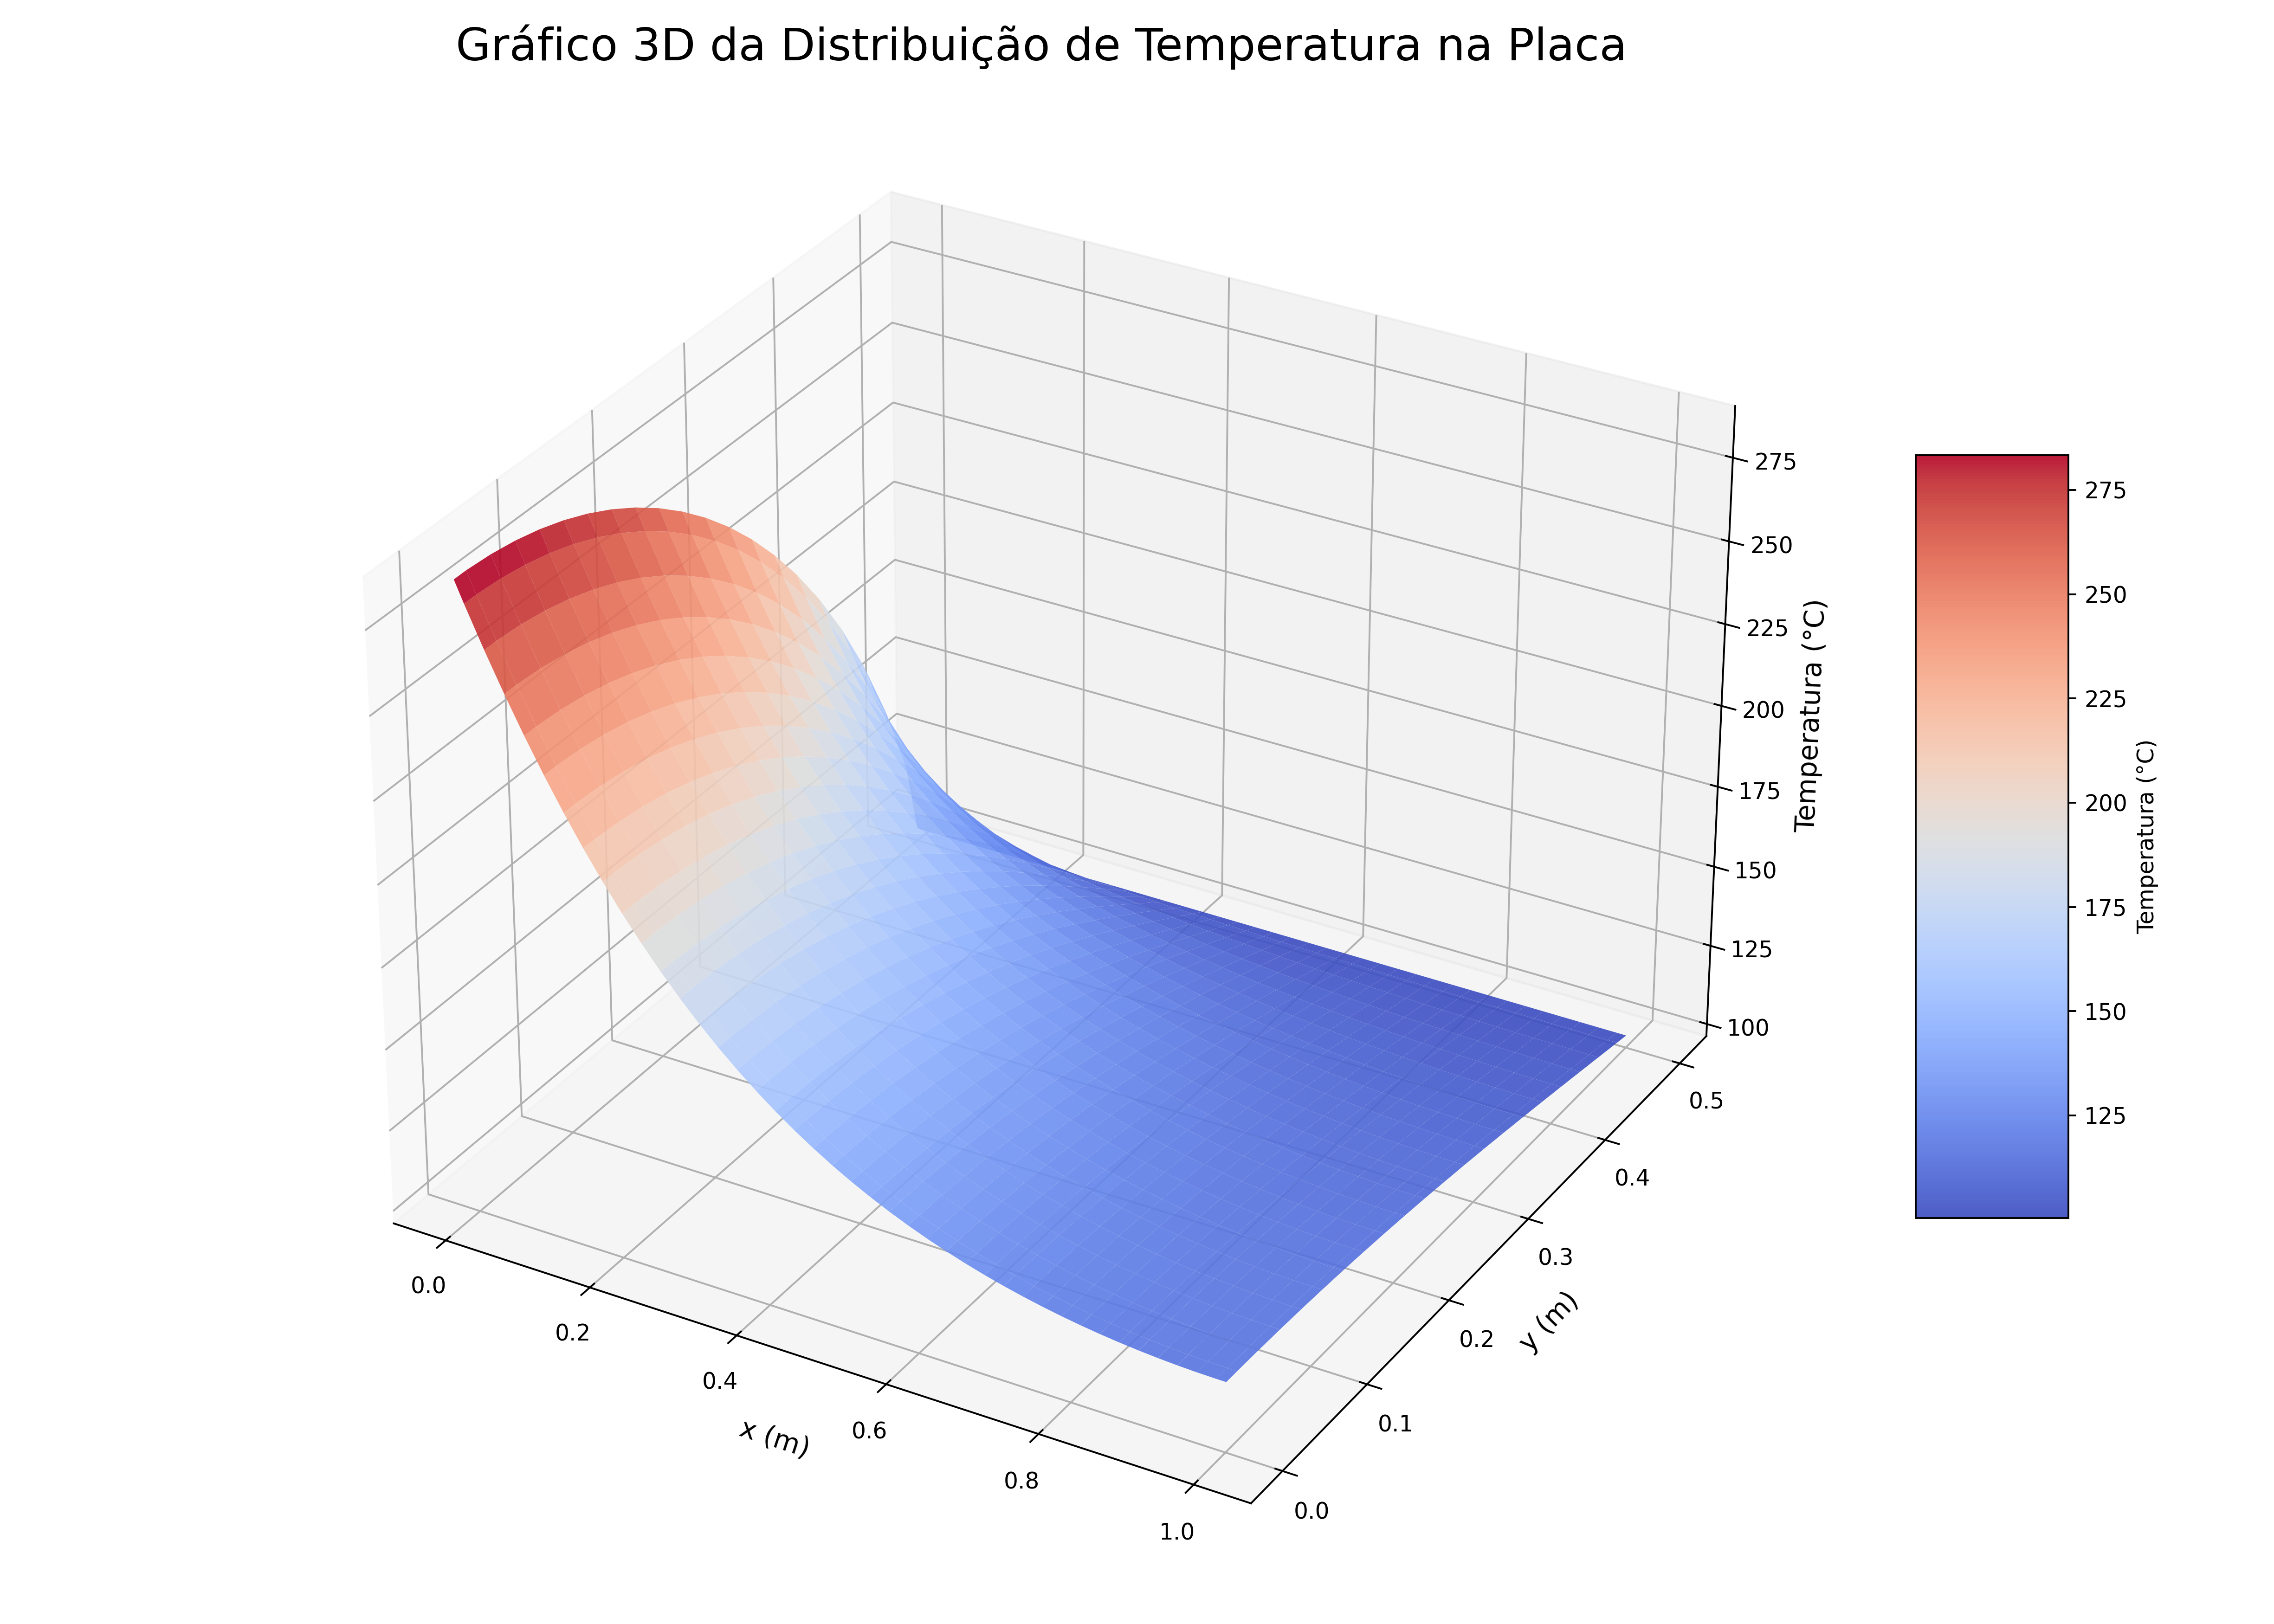

In [22]:
Image('Distribuição_3d_40x20.png',width=800)

## Validação dos Resultados

Nesta etapa do trabalho, propôs-se a validação dos resultados obtidos por meio das sub-rotinas desenvolvidas. Para esse fim, utilizou-se o *software* ANSYS Fluent, no qual as propriedades físicas e geométricas, bem como as condições de contorno do problema, foram fielmente mimetizadas, de modo a permitir uma comparação consistente entre as abordagens.

- Malha com 10x5 volumes:

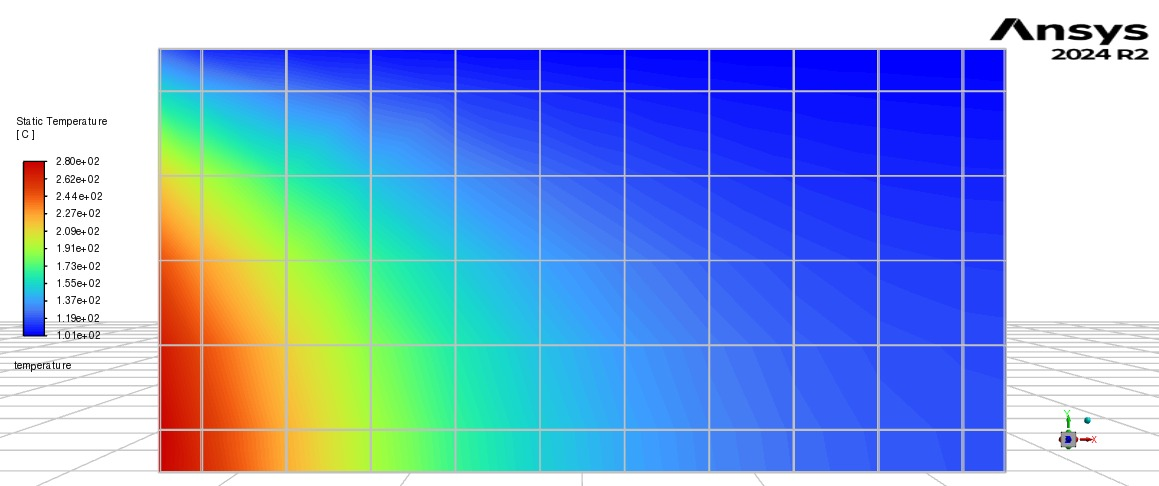

In [23]:
Image('ansys_10x5.jpeg',width=700)

- Malha com 40x20 volumes:

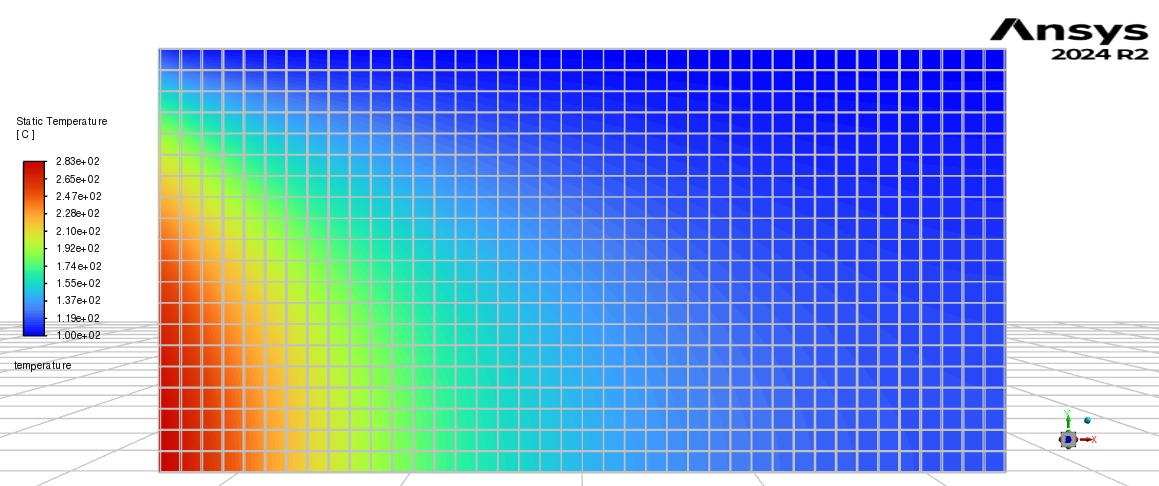

In [24]:
Image('ansys_40x20.jpeg',width=700)

Malha com 500x250 volumes:

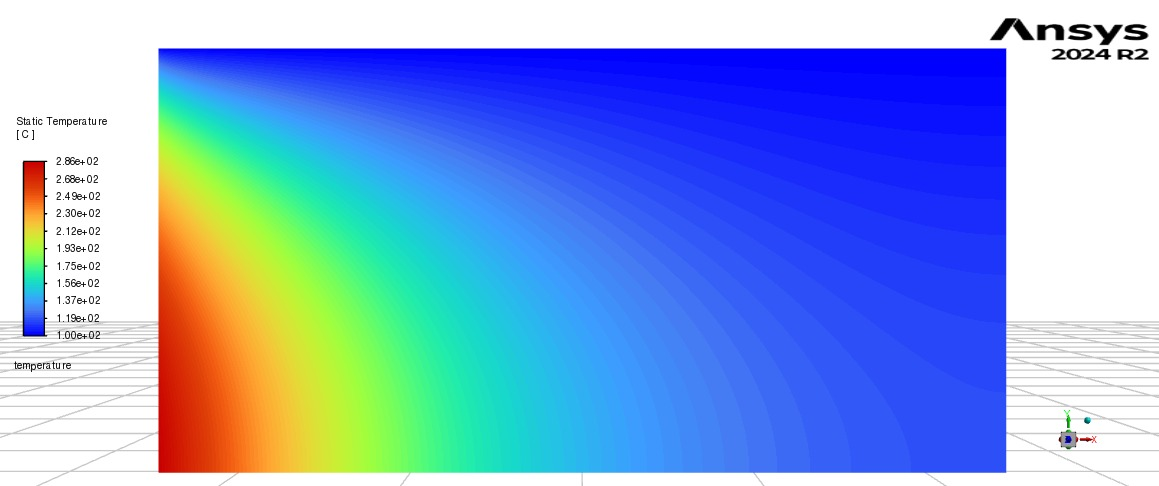

In [25]:
Image('ansys_500x250.jpeg',width=700)

## Discussão dos Resultados

Observa-se que as simulações realizadas tanto por meio das sub-rotinas desenvolvidas em Python quanto pelo *software* ANSYS Fluent convergem para um perfil de temperatura qualitativamente semelhante. Em ambos os casos, verifica-se a presença de um forte gradiente térmico na fronteira Oeste, decorrente da imposição de um elevado fluxo de calor $\left(500\ \text{kW/m}^2\right)$.

Como consequência direta dessa condição de contorno, as maiores temperaturas são registradas nessa região, mais especificamente no canto sudoeste da placa, cujos valores máximos obtidos para diferentes refinamentos de malha estão apresentados na Tabela a seguir.

| Volumes na malha | Python | Fluent |
|--------|--------|--------|
| 10 × 5 | 287,3 °C | 280 °C |
| 40 × 20 | 286,4 °C | 283 °C |

Nota-se que, à medida que a malha é refinada, os valores de temperatura máxima tornam-se mais próximos entre as duas abordagens numéricas, indicando consistência entre o método implementado e o solucionador comercial, além de evidenciar a influência do refinamento espacial na precisão dos resultados.

Ademais, uma foi realizada uma simulação contendo 500x250 volumes de controle, a qual encontrou-se 286°C, indicando ainda mais que o refinamento da malha tende a aproximar as soluções.

Outro aspecto relevante é o rápido decaimento da temperatura na direção Norte, com os valores tendendo ao patamar prescrito de 100°C. Esse comportamento está associado à condição de contorno térmica imposta nessa face, que atua como o principal mecanismo de remoção de calor do sistema.

Do ponto de vista físico, o campo de temperaturas obtido mostra-se coerente e consistente. O calor introduzido pela face Oeste é conduzido através da placa e, devido ao isolamento térmico das faces Sul e Leste, é predominantemente dissipado pela face Norte. Dessa forma, o padrão de distribuição térmica observado está em plena concordância com as condições de contorno adotadas e com os princípios fundamentais da condução de calor.


## Conclusão

O problema bidimensional de transferência de calor em regime permanente foi resolvido com sucesso por meio do Método dos Volumes Finitos, utilizando o esquema iterativo TDMA, conforme a metodologia apresentada no pseudocódigo. Os resultados obtidos mostraram-se fisicamente consistentes, atendendo às condições de contorno impostas e aos princípios fundamentais da condução de calor.

Além disso, as simulações desenvolvidas em Python apresentaram convergência com as feitas no Fluent, indicando a correta formulação do sistema algébrico resultante da discretização espacial. Dessa forma, a metodologia adotada mostrou-se eficaz para a análise de problemas bidimensionais de condução de calor em regime permanente.